# Car Price Prediction - Exploratory Data Analysis

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Data Quality Assessment](#data-quality-assessment) 
3. [Numerical Features Analysis](#numerical-features-analysis)
4. [Categorical Features Analysis](#categorical-features-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Summary Visualizations Dashboard](#summary-visualizations-dashboard)

---

## Dataset Overview

### Basic Dataset Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load data
train_relative_path = '../Data/train.csv'
test_relative_path = '../Data/test.csv'
train_data = pd.read_csv(train_relative_path)
test_data = pd.read_csv(test_relative_path)

# Dataset shape and basic info
print("=== DATASET OVERVIEW ===")
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")
print(f"Total features: {len(train_data.columns)}")

# Feature types
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

print("\n=== FEATURE TYPES ===")
print("Numerical:", numerical_features)
print("Categorical:", categorical_features)

# Display first few rows
print("\n=== SAMPLE DATA ===")
display(train_data.head())

=== DATASET OVERVIEW ===
Training set shape: (75973, 14)
Test set shape: (32567, 13)
Total features: 14
Numerical features: 10
Categorical features: 4

=== FEATURE TYPES ===
Numerical: ['carID', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']
Categorical: ['Brand', 'model', 'transmission', 'fuelType']

=== SAMPLE DATA ===


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


---

## Data Quality Assessment

### Missing Values Analysis

=== TRAINING SET MISSING DATA ANALYSIS ===
Total rows: 75,973
Rows with at least one NaN: 21,524 (28.33%)

=== FEATURES WITH MISSING VALUES ===
                Missing_Count  Missing_Percentage
mpg                      7926           10.432654
tax                      7904           10.403696
previousOwners           1550            2.040198
hasDamage                1548            2.037566
paintQuality%            1524            2.005976
transmission             1522            2.003343
Brand                    1521            2.002027
model                    1517            1.996762
engineSize               1516            1.995446
fuelType                 1511            1.988864
year                     1491            1.962539
mileage                  1463            1.925684


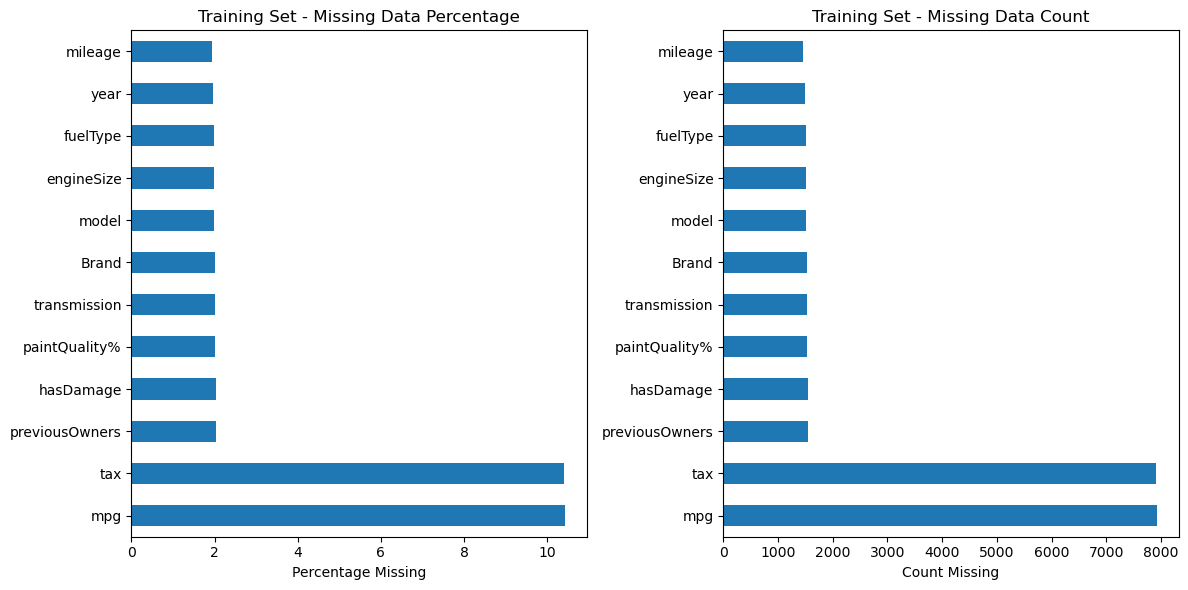

=== TEST SET MISSING DATA ANALYSIS ===
Total rows: 32,567
Rows with at least one NaN: 9,033 (27.74%)

=== FEATURES WITH MISSING VALUES ===
                Missing_Count  Missing_Percentage
tax                      3308           10.157521
mpg                      3288           10.096110
mileage                   689            2.115639
fuelType                  656            2.014309
year                      653            2.005097
model                     650            1.995885
Brand                     649            1.992815
engineSize                628            1.928332
paintQuality%             625            1.919121
transmission              623            1.912979
previousOwners            597            1.833144
hasDamage                 597            1.833144


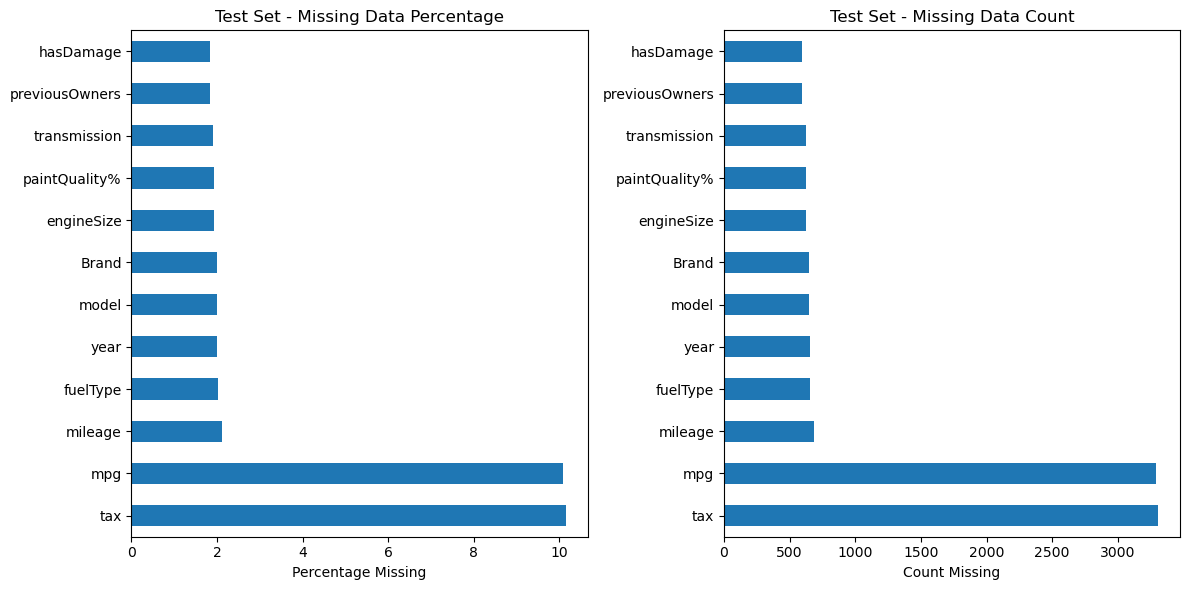

In [2]:
def analyze_missing_data(df, dataset_name="Dataset"):
    """Comprehensive missing data analysis"""
    print(f"=== {dataset_name.upper()} MISSING DATA ANALYSIS ===")
    
    # Overall missing data stats
    total_rows = len(df)
    rows_with_nan = df.isnull().any(axis=1).sum()
    print(f"Total rows: {total_rows:,}")
    print(f"Rows with at least one NaN: {rows_with_nan:,} ({rows_with_nan/total_rows*100:.2f}%)")
    
    # Feature-wise missing data
    missing_stats = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    }).sort_values('Missing_Percentage', ascending=False)
    
    missing_stats = missing_stats[missing_stats['Missing_Count'] > 0]
    
    if len(missing_stats) > 0:
        print(f"\n=== FEATURES WITH MISSING VALUES ===")
        print(missing_stats)
        
        # Visualization
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        missing_stats['Missing_Percentage'].plot(kind='barh')
        plt.title(f'{dataset_name} - Missing Data Percentage')
        plt.xlabel('Percentage Missing')
        
        plt.subplot(1, 2, 2)
        missing_stats['Missing_Count'].plot(kind='barh')
        plt.title(f'{dataset_name} - Missing Data Count')
        plt.xlabel('Count Missing')
        plt.tight_layout()
        plt.show()
    else:
        print("No missing values found!")
    
    return missing_stats

# Analyze both datasets
train_missing = analyze_missing_data(train_data, "Training Set")
test_missing = analyze_missing_data(test_data, "Test Set")

In [3]:
features = train_data.columns.tolist()
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
print(f"len of features: {len(features)}")
print(f"len of numerical features: {len(numerical_features)}")
print(f"len of categorical features: {len(categorical_features)}")
print(50*"-")
print("numerical features in the dataset:")
for feature in numerical_features:
    # get the type of the feature
    feature_type = train_data[feature].dtype
    print(f"{feature}: {feature_type}")
print(50*"-")
print("categorical features in the dataset:")
for feature in categorical_features:
    feature_type = train_data[feature].dtype
    print(f"{feature}: {feature_type}")

len of features: 14
len of numerical features: 10
len of categorical features: 4
--------------------------------------------------
numerical features in the dataset:
carID: int64
year: float64
price: int64
mileage: float64
tax: float64
mpg: float64
engineSize: float64
paintQuality%: float64
previousOwners: float64
hasDamage: float64
--------------------------------------------------
categorical features in the dataset:
Brand: object
model: object
transmission: object
fuelType: object


---

## Numerical Features Analysis

Each numerical feature will be analyzed for:
- **Statistics**: Basic descriptive statistics
- **Data Quality**: Missing values, outliers, invalid values
- **Distribution**: Shape, skewness, potential transformations
- **Suggested Transformations**: Recommended preprocessing steps

### Helper Functions for Analysis

In [4]:
def analyze_numerical_feature(df, feature_name, target_col='price', correlate = True):
    """Comprehensive numerical feature analysis"""
    
    print(f"\n{'='*60}")
    print(f"ANALYZING: {feature_name.upper()}")
    print(f"{'='*60}")
    
    feature_data = df[feature_name].dropna()
    
    # Basic Statistics
    stats_dict = {
        'Count': len(feature_data),
        'Missing': df[feature_name].isnull().sum(),
        'Missing %': (df[feature_name].isnull().sum() / len(df)) * 100,
        'Min': feature_data.min(),
        'Max': feature_data.max(),
        'Mean': feature_data.mean(),
        'Median': feature_data.median(),
        'Std': feature_data.std(),
        'Skewness': feature_data.skew(),
        'Kurtosis': feature_data.kurtosis()
    }
    
    print("=== BASIC STATISTICS ===")
    for key, value in stats_dict.items():
        if key in ['Missing %', 'Mean', 'Median', 'Std', 'Skewness', 'Kurtosis']:
            print(f"{key}: {value:.3f}")
        else:
            print(f"{key}: {value}")
    
    # Data Quality Issues
    print("\n=== DATA QUALITY ASSESSMENT ===")
    negative_count = (feature_data < 0).sum()
    zero_count = (feature_data == 0).sum()
    
    print(f"Negative values: {negative_count} ({negative_count/len(feature_data)*100:.2f}%)")
    print(f"Zero values: {zero_count} ({zero_count/len(feature_data)*100:.2f}%)")
    
    # Outlier Analysis
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]
    print(f"Outliers (IQR method): {len(outliers)} ({len(outliers)/len(feature_data)*100:.2f}%)")
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution plot
    axes[0,0].hist(feature_data, bins=50, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(feature_data.mean(), color='red', linestyle='--', label='Mean')
    axes[0,0].axvline(feature_data.median(), color='green', linestyle='--', label='Median')
    axes[0,0].set_title(f'{feature_name} Distribution')
    axes[0,0].legend()
    
    # Box plot
    axes[0,1].boxplot(feature_data)
    axes[0,1].set_title(f'{feature_name} Box Plot')
    axes[0,1].set_ylabel(feature_name)
    
    # QQ plot for normality
    stats.probplot(feature_data, dist="norm", plot=axes[1,0])
    axes[1,0].set_title(f'{feature_name} Q-Q Plot')
    
    # Correlation with target (if available)
    if target_col in df.columns and correlate:
        target_data = df[target_col].dropna()
        feature_target = df[[feature_name, target_col]].dropna()
        
        correlation = feature_target[feature_name].corr(feature_target[target_col])
        axes[1,1].scatter(feature_target[feature_name], feature_target[target_col], alpha=0.5)
        axes[1,1].set_xlabel(feature_name)
        axes[1,1].set_ylabel(target_col)
        axes[1,1].set_title(f'{feature_name} vs {target_col}\nCorrelation: {correlation:.3f}')
    
    plt.tight_layout()
    plt.show()
    
    # Transformation Suggestions
    print("\n=== TRANSFORMATION SUGGESTIONS ===")
    
    if negative_count > 0:
        print("⚠️  Contains negative values - consider absolute transformation or offset")
    
    if stats_dict['Skewness'] > 1:
        print("⚠️  Highly right-skewed - consider log transformation")
    elif stats_dict['Skewness'] < -1:
        print("⚠️  Highly left-skewed - consider power transformation")
    
    if len(outliers) > len(feature_data) * 0.05:  # More than 5% outliers
        print("⚠️  High percentage of outliers - consider outlier treatment")
    
    if zero_count > len(feature_data) * 0.1:  # More than 10% zeros
        print("⚠️  Many zero values - consider log1p transformation")
    
    return stats_dict

def suggest_transformations(df, feature_name):
    """Suggest and apply transformations"""
    print(f"\n=== TRANSFORMATION EXPERIMENTS FOR {feature_name.upper()} ===")
    
    original_data = df[feature_name].dropna()
    
    # Try different transformations
    transformations = {}
    
    # Log transformation (handling negative/zero values)
    if (original_data <= 0).any():
        transformations['log1p_abs'] = np.log1p(np.abs(original_data))
        transformations['log1p_shifted'] = np.log1p(original_data + abs(original_data.min()) + 1)
    else:
        transformations['log'] = np.log(original_data)
        transformations['log1p'] = np.log1p(original_data)
    
    # Square root (for positive values)
    if (original_data >= 0).all():
        transformations['sqrt'] = np.sqrt(original_data)
    
    # Box-Cox (for positive values)
    if (original_data > 0).all():
        transformed_data, lambda_param = stats.boxcox(original_data)
        transformations[f'boxcox_λ={lambda_param:.3f}'] = transformed_data
    
    # Compare transformations
    fig, axes = plt.subplots(2, len(transformations) + 1, figsize=(5 * (len(transformations) + 1), 8))
    
    # Original data
    axes[0,0].hist(original_data, bins=30, alpha=0.7)
    axes[0,0].set_title('Original')
    stats.probplot(original_data, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Original Q-Q')
    
    # Transformed data
    for i, (name, transformed) in enumerate(transformations.items(), 1):
        axes[0,i].hist(transformed, bins=30, alpha=0.7)
        axes[0,i].set_title(name)
        stats.probplot(transformed, dist="norm", plot=axes[1,i])
        axes[1,i].set_title(f'{name} Q-Q')
        
        # Print skewness comparison
        original_skew = original_data.skew()
        transformed_skew = pd.Series(transformed).skew()
        print(f"{name}: Skewness {original_skew:.3f} → {transformed_skew:.3f}")
    
    plt.tight_layout()
    plt.show()
    
    return transformations

## check nan presence in train and test data
they both have nan values so we will need to handle them appropriately but we cannot drop them entirely

In [5]:
# count how may rows contain at least one NaN value
num_rows_with_nan = train_data.isnull().any(axis=1).sum()
print(50*"-")
print(f"Number of rows with at least one NaN value: {num_rows_with_nan}")
# count how many rows are in the dataset
num_rows = train_data.shape[0]
print(f"Total number of rows in the dataset: {num_rows}")
# calculate the percentage of rows with at least one NaN value
percentage_rows_with_nan = (num_rows_with_nan / num_rows) * 100
print(f"Percentage of rows with at least one NaN value: {percentage_rows_with_nan:.2f}%")   

--------------------------------------------------
Number of rows with at least one NaN value: 21524
Total number of rows in the dataset: 75973
Percentage of rows with at least one NaN value: 28.33%


In [6]:
# count how may rows contain at least one NaN value
num_rows_with_nan = test_data.isnull().any(axis=1).sum()
print(50*"-")
print(f"Number of rows with at least one NaN value: {num_rows_with_nan}")
# count how many rows are in the dataset
num_rows = test_data.shape[0]
print(f"Total number of rows in the dataset: {num_rows}")
# calculate the percentage of rows with at least one NaN value
percentage_rows_with_nan = (num_rows_with_nan / num_rows) * 100
print(f"Percentage of rows with at least one NaN value: {percentage_rows_with_nan:.2f}%")  

--------------------------------------------------
Number of rows with at least one NaN value: 9033
Total number of rows in the dataset: 32567
Percentage of rows with at least one NaN value: 27.74%


## numerical feature exploration

### 1. carID - Car Identifier


ANALYZING: CARID
=== BASIC STATISTICS ===
Count: 75973
Missing: 0
Missing %: 0.000
Min: 0
Max: 75972
Mean: 37986.000
Median: 37986.000
Std: 21931.660
Skewness: 0.000
Kurtosis: -1.200

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 1 (0.00%)
Outliers (IQR method): 0 (0.00%)


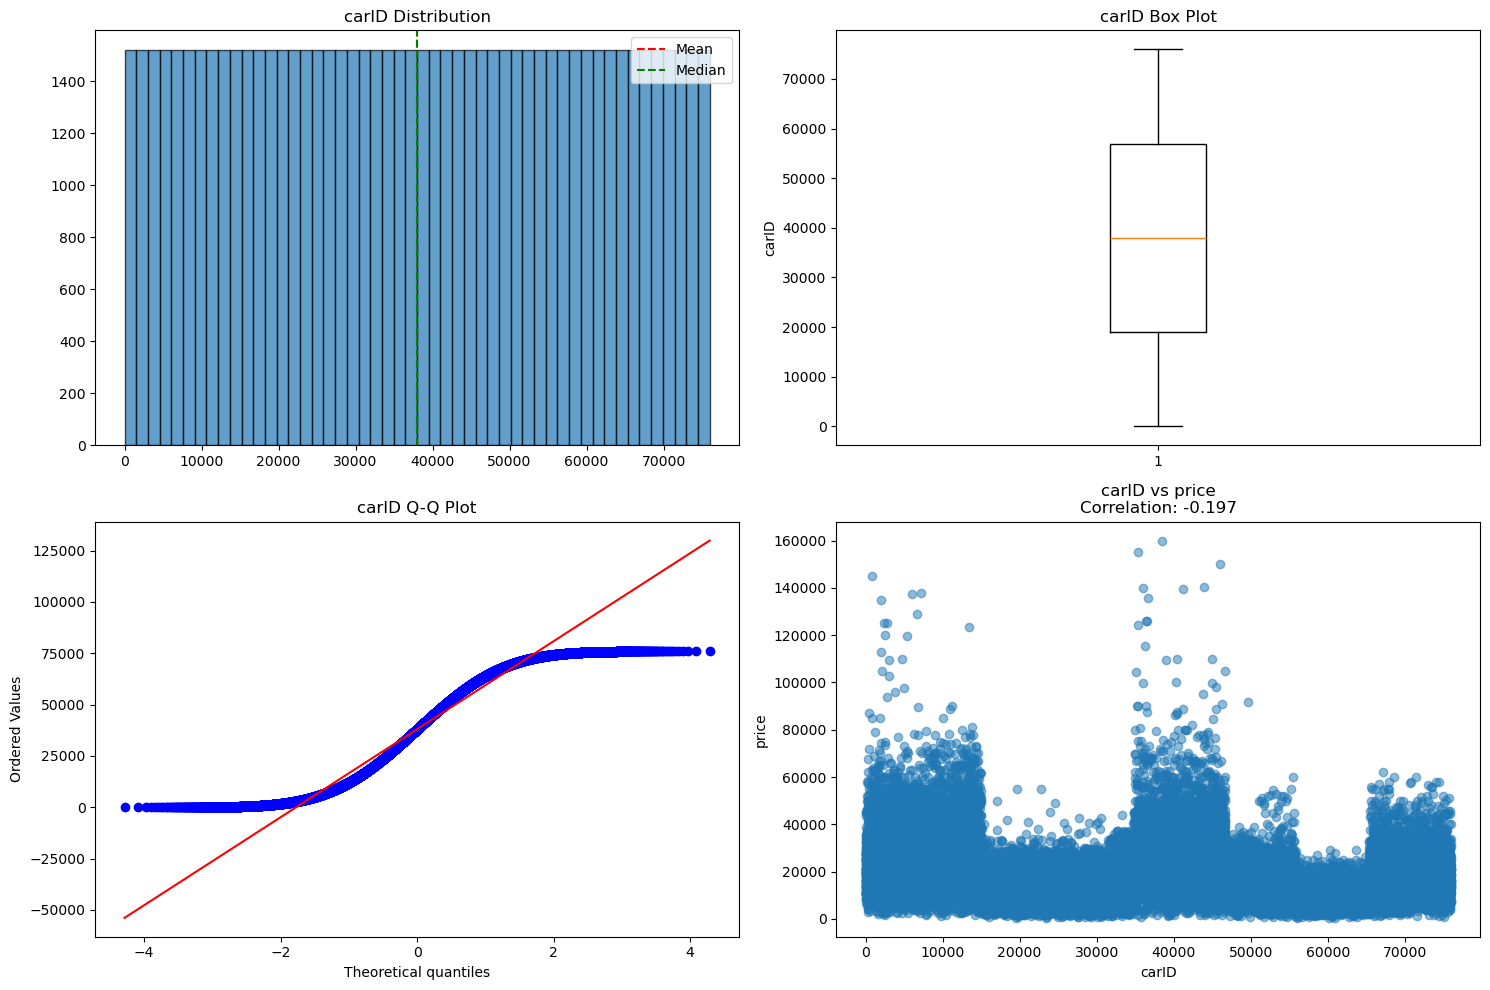


=== TRANSFORMATION SUGGESTIONS ===

=== carID SPECIFIC ANALYSIS ===
Uniqueness: 75973 unique values out of 75973 (100.0%)


In [7]:
analyze_numerical_feature(train_data, 'carID')

# Additional carID specific analysis
print("\n=== carID SPECIFIC ANALYSIS ===")
unique_ratio = train_data['carID'].nunique() / len(train_data)
print(f"Uniqueness: {train_data['carID'].nunique()} unique values out of {len(train_data)} ({unique_ratio*100:.1f}%)")

if unique_ratio < 1.0:
    duplicates = train_data['carID'].duplicated().sum()
    print(f"⚠️  {duplicates} duplicate carIDs found")

### 2. year - Registration Year


ANALYZING: YEAR
=== BASIC STATISTICS ===
Count: 74482
Missing: 1491
Missing %: 1.963
Min: 1970.0
Max: 2024.1217590521203
Mean: 2017.097
Median: 2017.000
Std: 2.209
Skewness: -1.854
Kurtosis: 11.801

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 0 (0.00%)
Outliers (IQR method): 1791 (2.40%)


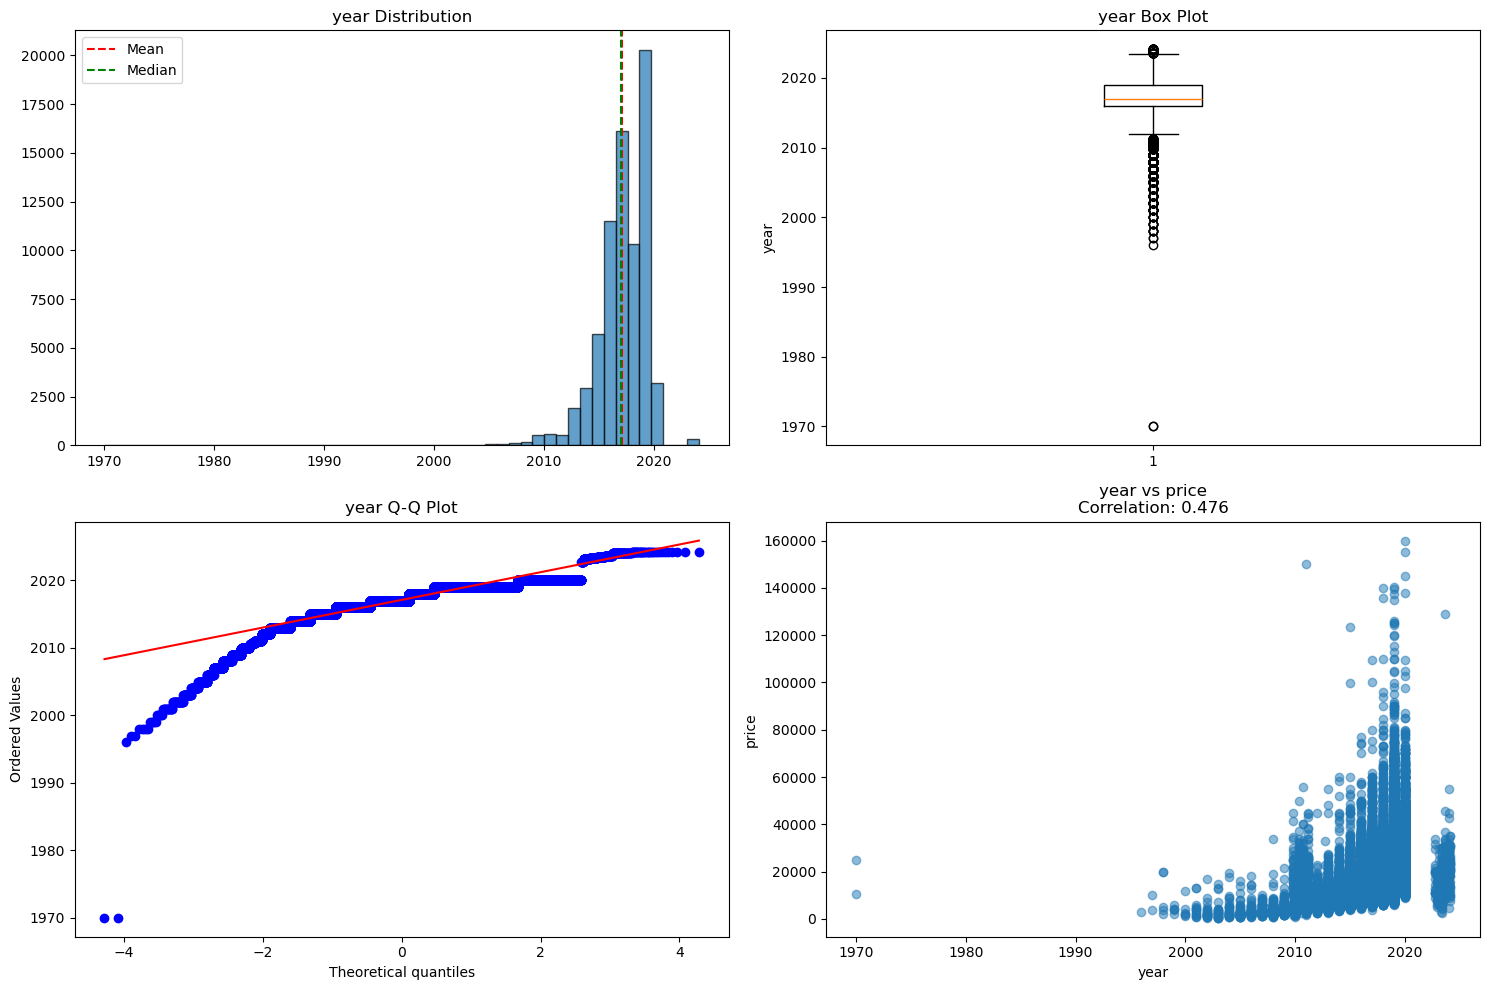


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Highly left-skewed - consider power transformation

=== YEAR SPECIFIC ISSUES ===
Cars with future years: 0
Cars older than 1900: 0
cars with decimal year 2214
Car age range: 0.8782409478797035 to 55.0 years


In [8]:
analyze_numerical_feature(train_data, 'year')

# Year-specific analysis
current_year = 2025
future_years = (train_data['year'] > current_year).sum()
very_old_cars = (train_data['year'] < 1900).sum()
# cars with decimal yer
car_with_decimal_year = len(train_data[train_data['year'] % 1 != 0])

print(f"\n=== YEAR SPECIFIC ISSUES ===")
print(f"Cars with future years: {future_years}")
print(f"Cars older than 1900: {very_old_cars}")
print(f"cars with decimal year {car_with_decimal_year}")

# Age calculation
train_data_temp = train_data.copy()
train_data_temp['car_age'] = current_year - train_data_temp['year']
print(f"Car age range: {train_data_temp['car_age'].min()} to {train_data_temp['car_age'].max()} years")

### Price (out target)
The car’s price when purchased by Cars 4 You (in £)


ANALYZING: PRICE
=== BASIC STATISTICS ===
Count: 75973
Missing: 0
Missing %: 0.000
Min: 450
Max: 159999
Mean: 16881.890
Median: 14699.000
Std: 9736.926
Skewness: 2.284
Kurtosis: 12.001

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 0 (0.00%)
Outliers (IQR method): 2695 (3.55%)


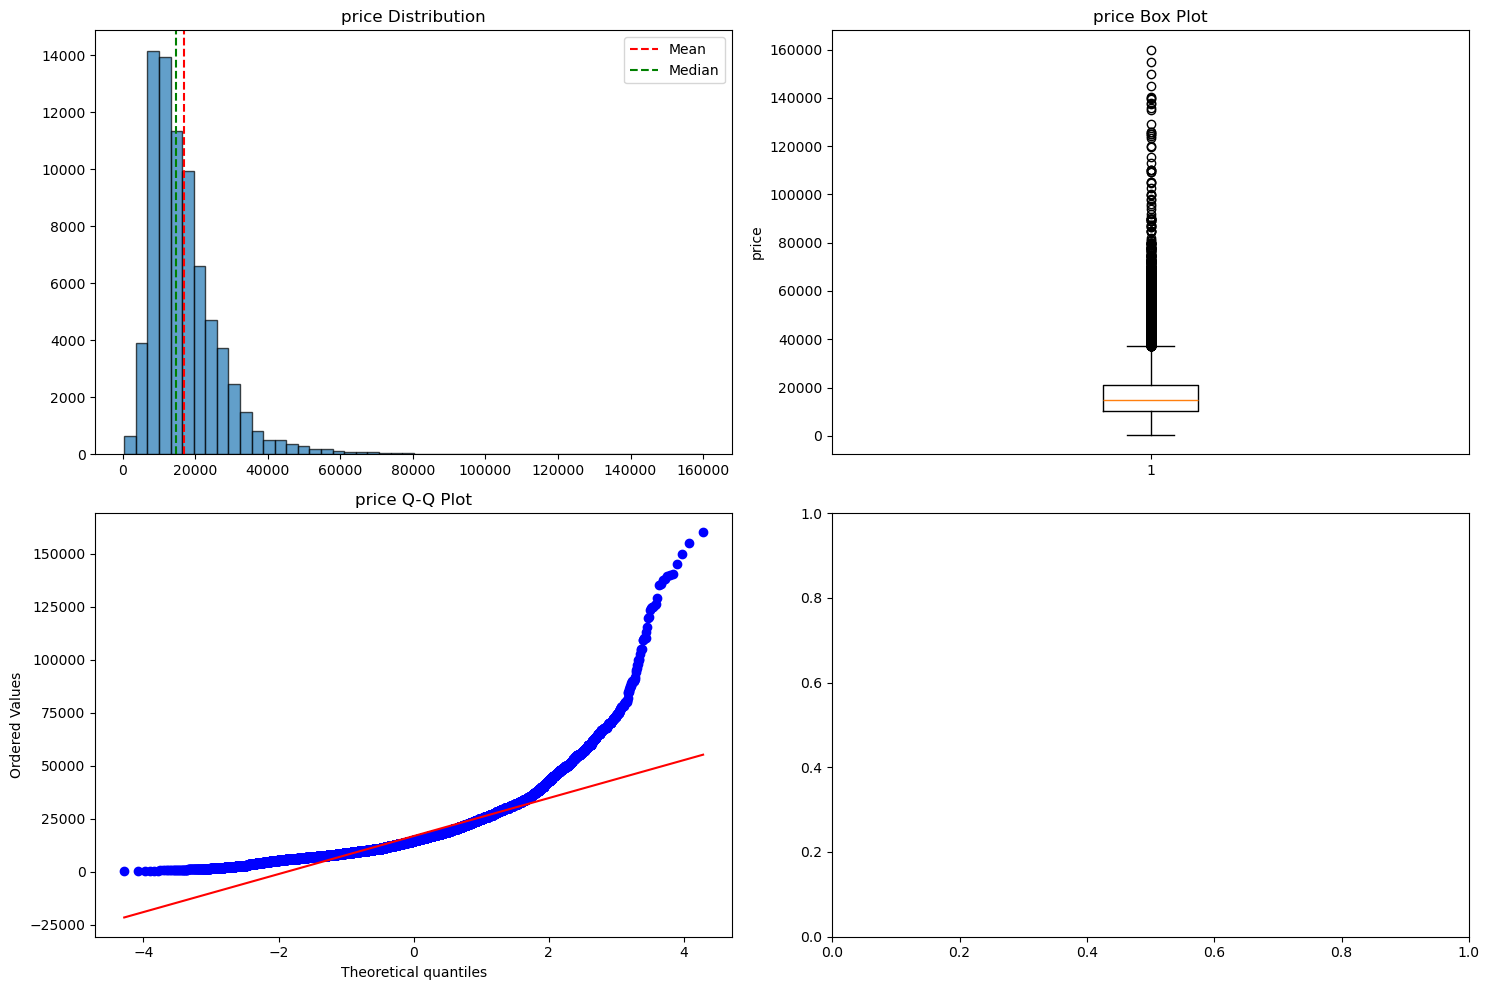


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Highly right-skewed - consider log transformation

=== PRICE SPECIFIC ANALYSIS ===
Negative prices: 0 (0.00%)
Zero prices: 0 (0.00%)

=== TRANSFORMATION EXPERIMENTS FOR PRICE ===
log: Skewness 2.284 → -0.144
log1p: Skewness 2.284 → -0.144
sqrt: Skewness 2.284 → 0.909
boxcox_λ=0.068: Skewness 2.284 → 0.009


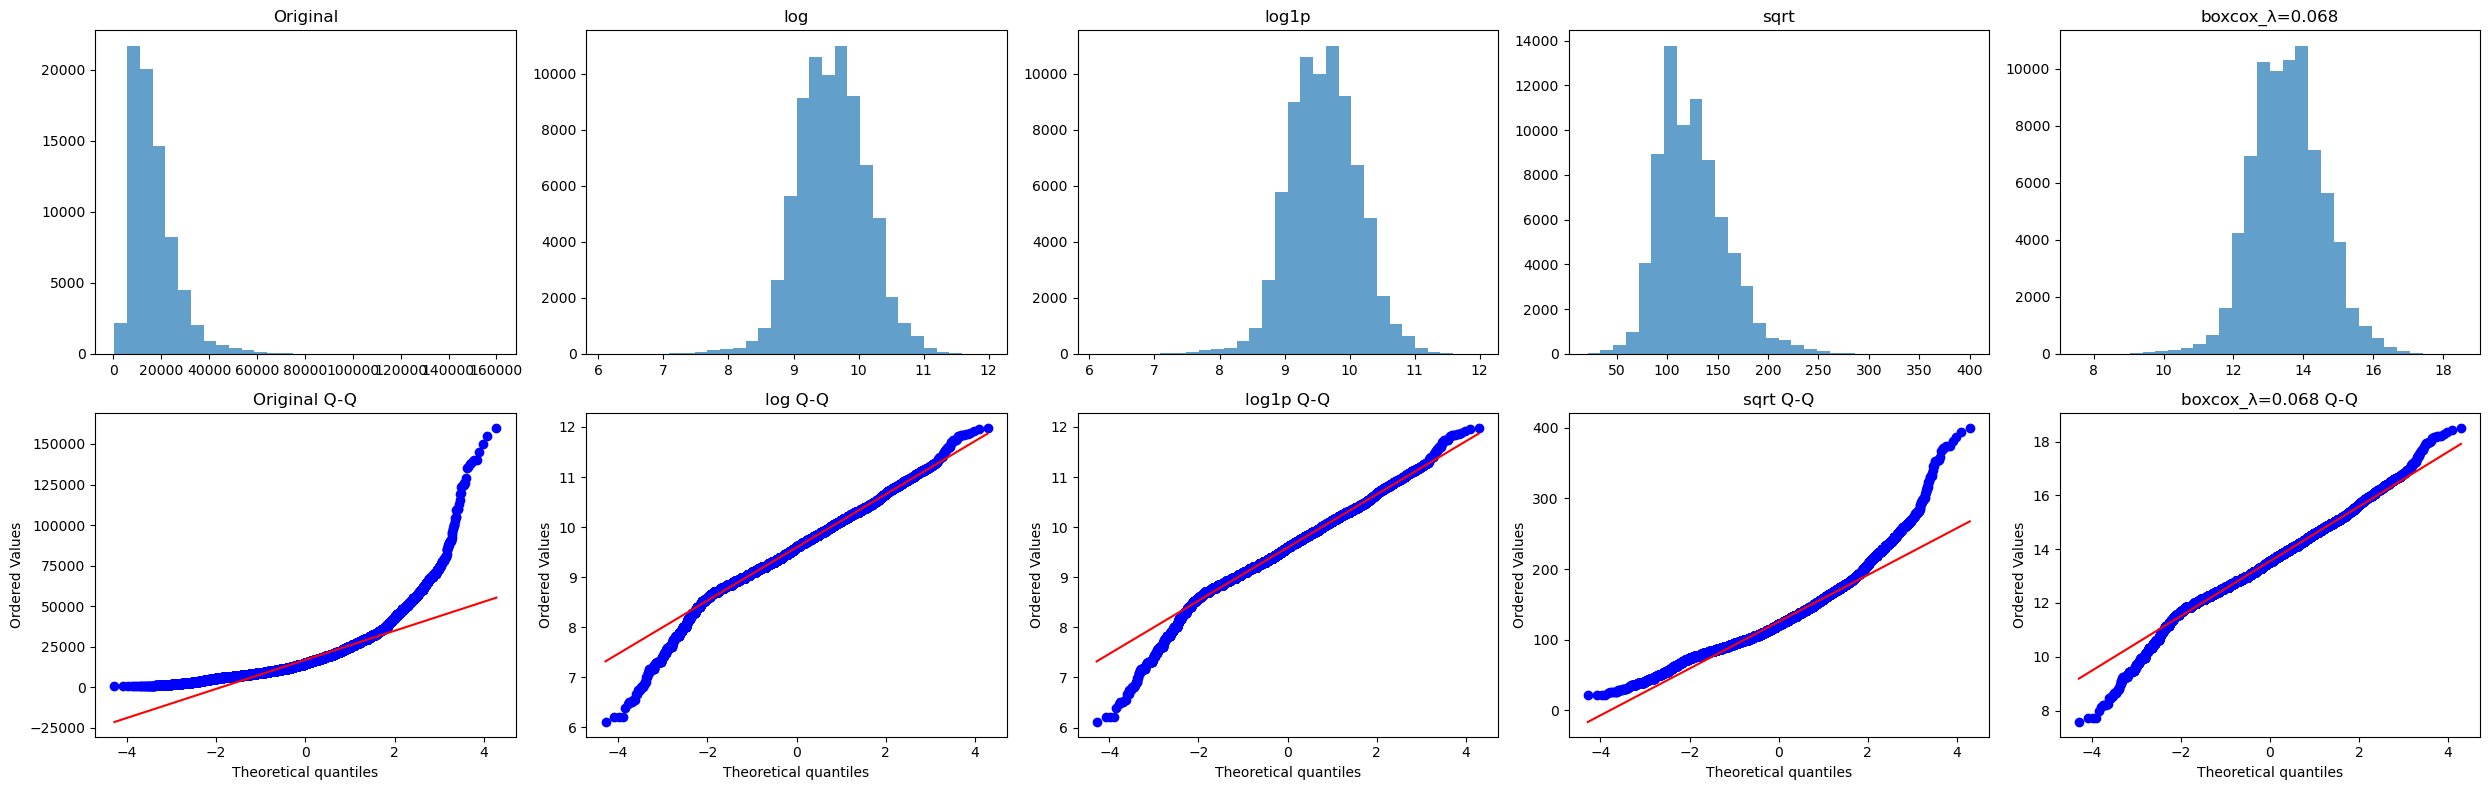

In [9]:
analyze_numerical_feature(train_data, 'price', correlate = False)

# Additional price analysis
print(f"\n=== PRICE SPECIFIC ANALYSIS ===")
negative_prices = (train_data['price'] < 0).sum()
zero_prices = (train_data['price'] == 0).sum()

print(f"Negative prices: {negative_prices} ({negative_prices/len(train_data)*100:.2f}%)")
print(f"Zero prices: {zero_prices} ({zero_prices/len(train_data)*100:.2f}%)")

# Price transformation experiments
price_transformations = suggest_transformations(train_data, 'price')

### 4. mileage - Total Distance Travelled


ANALYZING: MILEAGE
=== BASIC STATISTICS ===
Count: 74510
Missing: 1463
Missing %: 1.926
Min: -58540.574477557704
Max: 323000.0
Mean: 23004.184
Median: 17300.000
Std: 22129.788
Skewness: 1.555
Kurtosis: 5.229

=== DATA QUALITY ASSESSMENT ===
Negative values: 369 (0.50%)
Zero values: 0 (0.00%)
Outliers (IQR method): 3617 (4.85%)


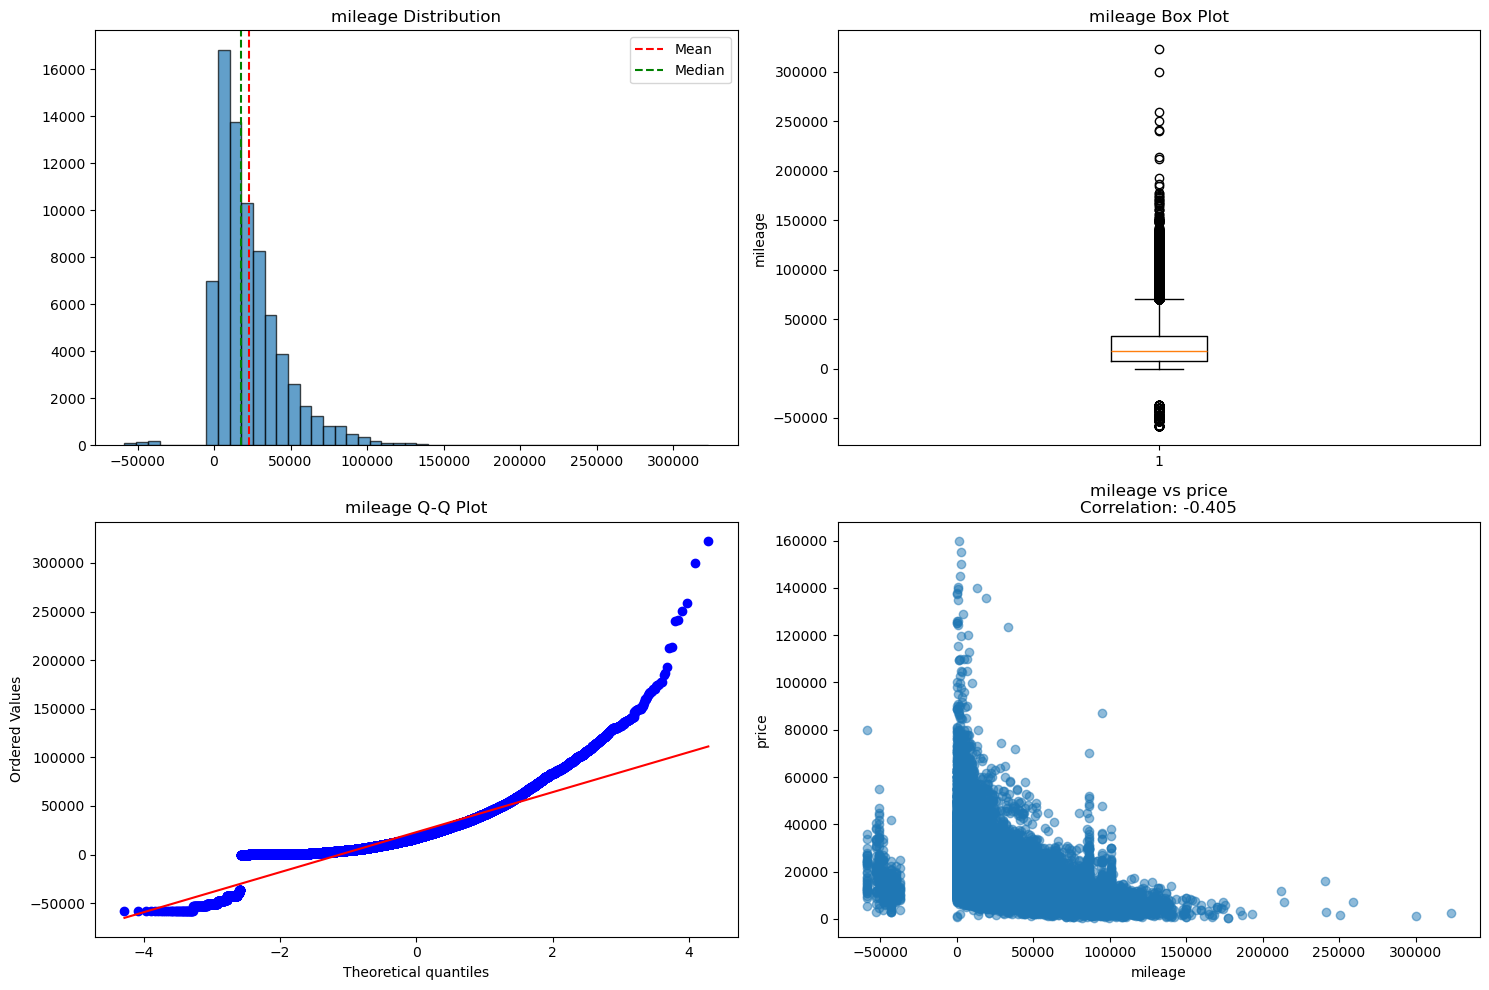


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Contains negative values - consider absolute transformation or offset
⚠️  Highly right-skewed - consider log transformation

=== MILEAGE SPECIFIC ANALYSIS ===
Negative mileage (data error): 369

=== TRANSFORMATION EXPERIMENTS FOR MILEAGE ===
log1p_abs: Skewness 1.555 → -2.249
log1p_shifted: Skewness 1.555 → -13.788


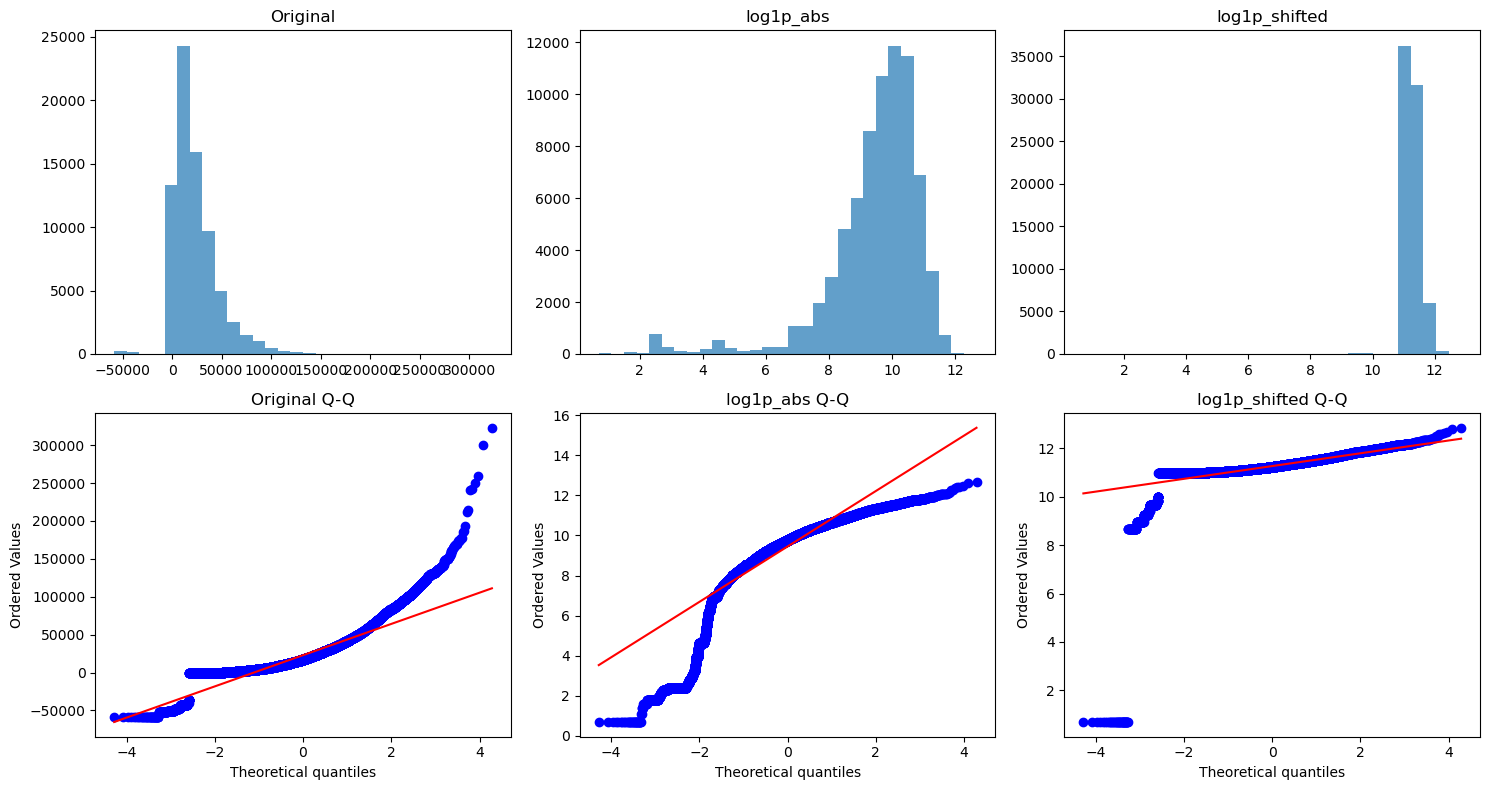

In [15]:
analyze_numerical_feature(train_data, 'mileage')

# Mileage-specific analysis
print(f"\n=== MILEAGE SPECIFIC ANALYSIS ===")
negative_mileage = (train_data['mileage'] < 0).sum()
print(f"Negative mileage (data error): {negative_mileage}")

# Mileage transformation experiments
mileage_transformations = suggest_transformations(train_data, 'mileage')

### 5. tax - Road Tax Amount


ANALYZING: TAX
=== BASIC STATISTICS ===
Count: 68069
Missing: 7904
Missing %: 10.404
Min: -91.12163047754362
Max: 580.0
Mean: 120.329
Median: 145.000
Std: 65.521
Skewness: 0.051
Kurtosis: 3.563

=== DATA QUALITY ASSESSMENT ===
Negative values: 378 (0.56%)
Zero values: 4320 (6.35%)
Outliers (IQR method): 20306 (29.83%)


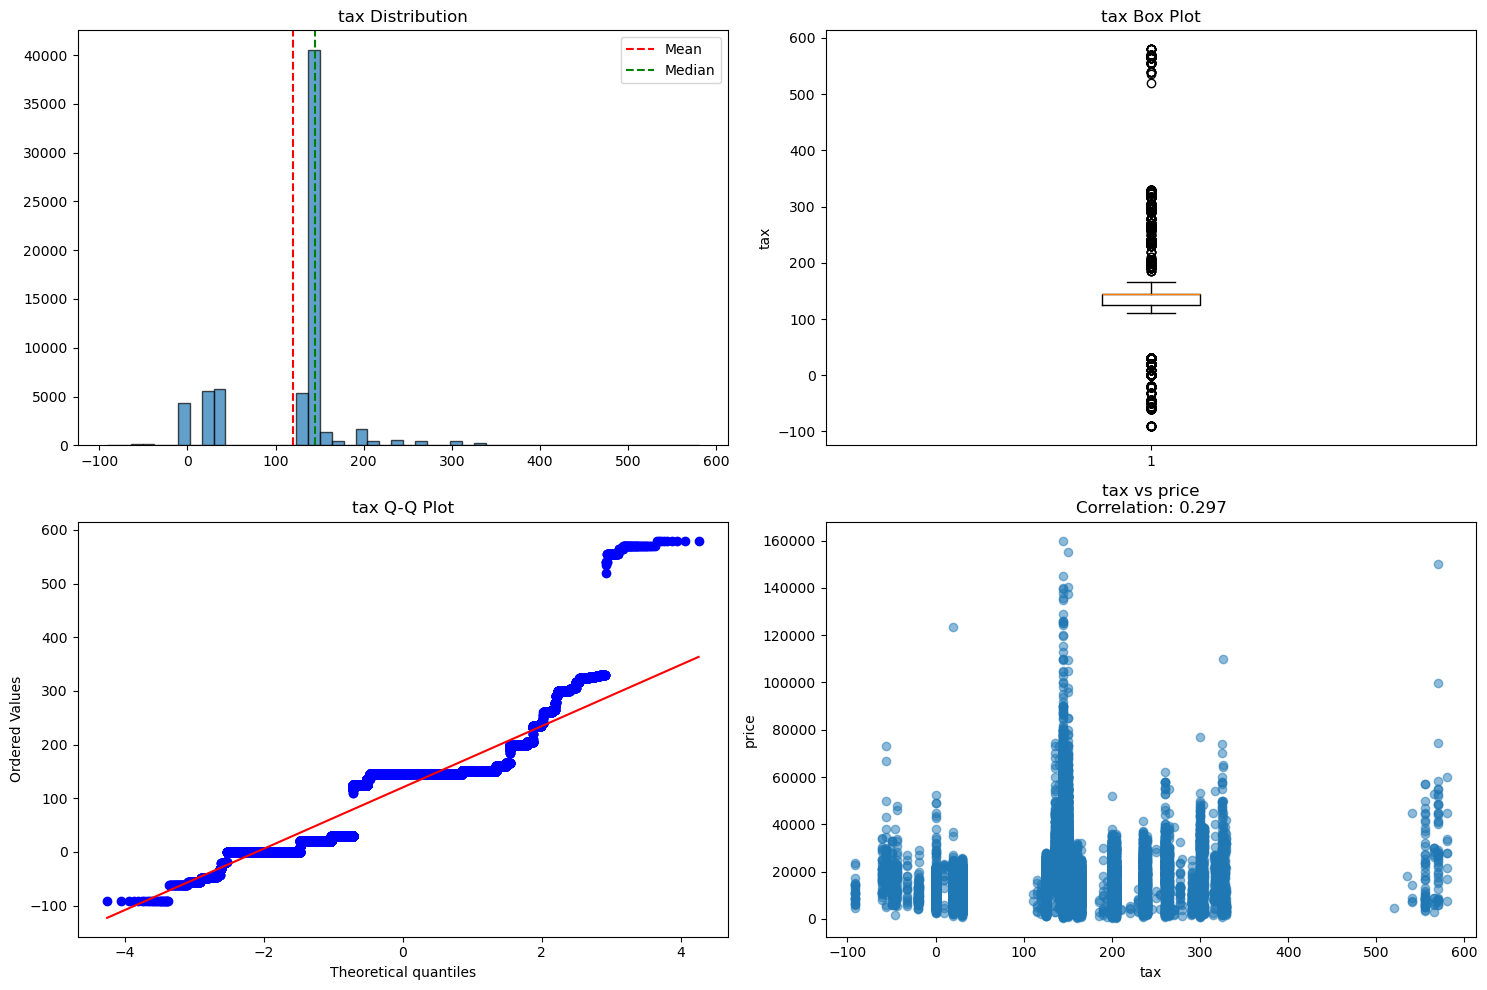


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Contains negative values - consider absolute transformation or offset
⚠️  High percentage of outliers - consider outlier treatment

=== TAX SPECIFIC ANALYSIS ===
Cars with zero/negative tax: 4698 (6.18%)
Fuel types of zero-tax cars:
fuelType
Diesel      1748
Petrol      1613
Hybrid       813
DIESEL        48
iesel         44
etrol         39
Petro         37
petrol        37
Diese         36
Other         32
PETROL        30
Hybri         27
diesel        25
hybrid        17
HYBRID        17
ybrid         16
IESEL          5
Electric       4
iese           1
diese          1
ETROL          1
other          1
PETRO          1
YBRID          1
HYBRI          1
Name: count, dtype: int64


In [16]:
analyze_numerical_feature(train_data, 'tax')

# Tax-specific analysis
zero_tax_cars = train_data[train_data['tax'] <= 0]
print(f"\n=== TAX SPECIFIC ANALYSIS ===")
print(f"Cars with zero/negative tax: {len(zero_tax_cars)} ({len(zero_tax_cars)/len(train_data)*100:.2f}%)")

if len(zero_tax_cars) > 0:
    print("Fuel types of zero-tax cars:")
    print(zero_tax_cars['fuelType'].value_counts())

## try tax over price ratio

In [ ]:
tax_over_price = train_data['tax'].abs() / train_data['price']
tax_over_price_max = tax_over_price.max()
tax_over_price_min = tax_over_price.min()
tax_over_price_mean = tax_over_price.mean()
tax_over_price_median = tax_over_price.median()
tax_over_price_std = tax_over_price.std()
print(f"tax over price - max: {tax_over_price_max}, min: {tax_over_price_min} \nmean: {tax_over_price_mean:.4f}, median: {tax_over_price_median:.4f}, std: {tax_over_price_std:.4f}")


# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tax_over_price)
# line for mean
plt.axvline(tax_over_price_mean, color='r', linestyle='--', label='Mean')
plt.title('Box Plot of Tax over Price')
plt.xlabel('Tax over Price')
# legend
plt.legend()
plt.show()


In [ ]:
# plot the distribution of tax over price
plt.figure(figsize=(10, 6))
sns.histplot(tax_over_price, bins=50, kde=True)
plt.title('Distribution of Tax over Price')
plt.xlabel('Tax over Price')
plt.ylabel('Frequency')
plt.show()  

### 6. mpg - Miles Per Gallon


ANALYZING: MPG
=== BASIC STATISTICS ===
Count: 68047
Missing: 7926
Missing %: 10.433
Min: -43.42176751067029
Max: 470.8
Mean: 55.153
Median: 54.300
Std: 16.498
Skewness: 7.297
Kurtosis: 158.657

=== DATA QUALITY ASSESSMENT ===
Negative values: 36 (0.05%)
Zero values: 0 (0.00%)
Outliers (IQR method): 1200 (1.76%)


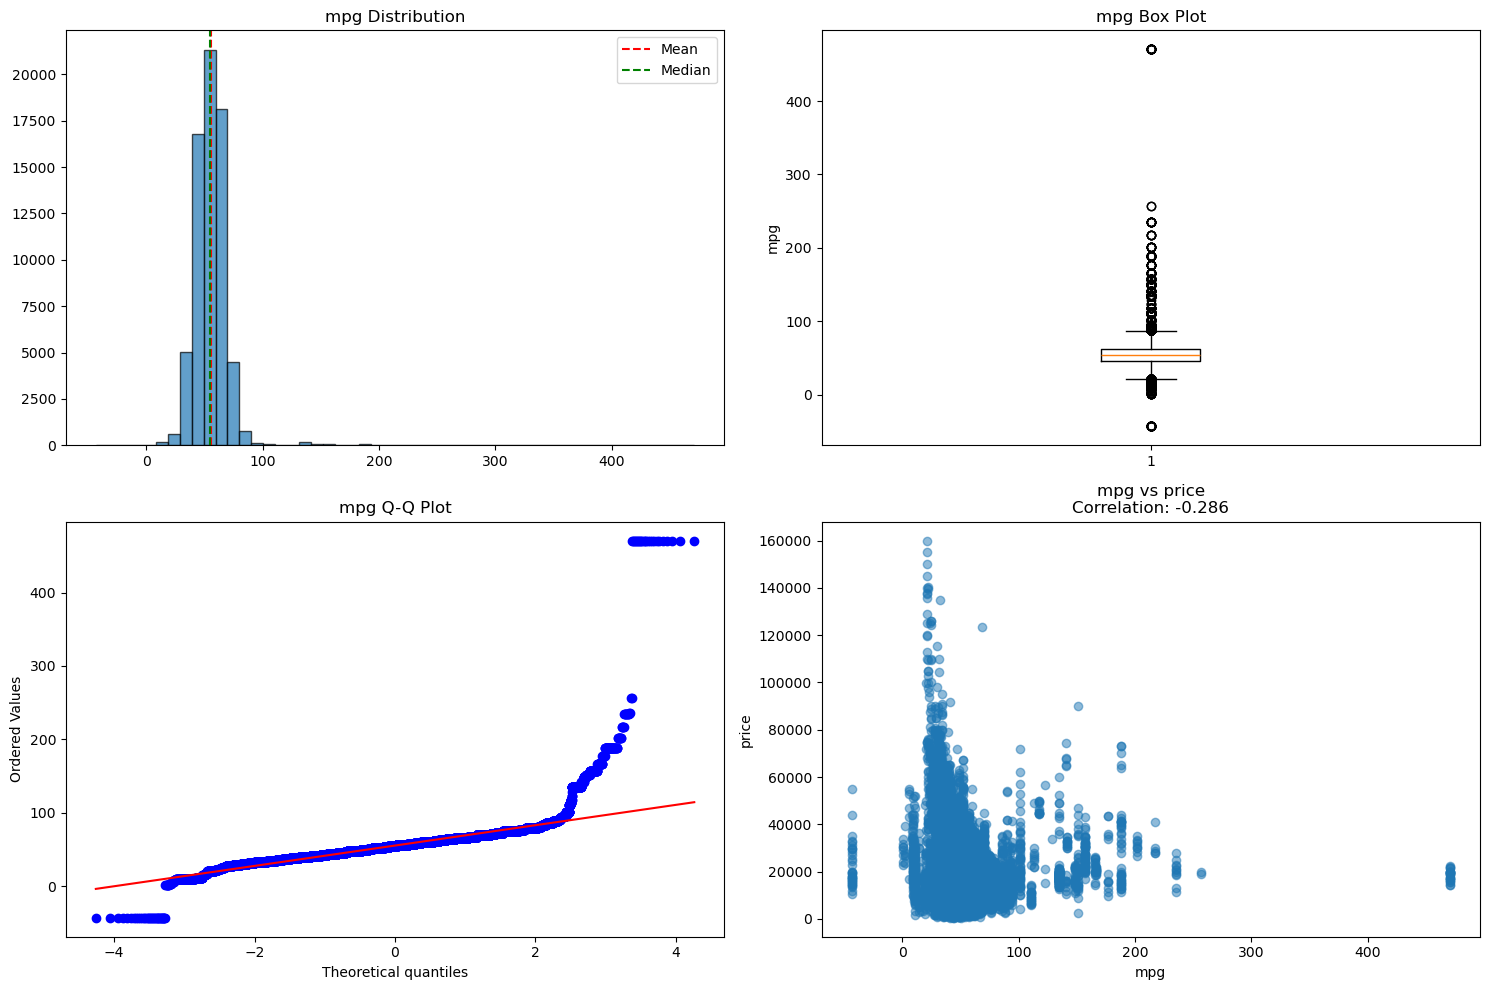


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Contains negative values - consider absolute transformation or offset
⚠️  Highly right-skewed - consider log transformation

=== MPG SPECIFIC ANALYSIS ===
Fuel types of cars with missing MPG:
fuelType
Petrol    3854
Diesel    3206
Hybrid     124
etrol       82
Petro       79
diesel      78
petrol      71
PETROL      66
iesel       66
Diese       61
DIESEL      54
Other        7
hybrid       6
HYBRID       4
Hybri        4
etro         2
ybri         1
DIESE        1
IESEL        1
iese         1
petro        1
PETRO        1
diese        1
Name: count, dtype: int64


In [17]:
analyze_numerical_feature(train_data, 'mpg')

# MPG-specific analysis
nan_mpg_cars = train_data[train_data['mpg'].isnull()]
print(f"\n=== MPG SPECIFIC ANALYSIS ===")
print("Fuel types of cars with missing MPG:")
print(nan_mpg_cars['fuelType'].value_counts())

### 7. engineSize - Engine Size


ANALYZING: ENGINESIZE
=== BASIC STATISTICS ===
Count: 74457
Missing: 1516
Missing %: 1.995
Min: -0.1034927966382504
Max: 6.6
Mean: 1.660
Median: 1.600
Std: 0.573
Skewness: 1.233
Kurtosis: 4.438

=== DATA QUALITY ASSESSMENT ===
Negative values: 84 (0.11%)
Zero values: 180 (0.24%)
Outliers (IQR method): 716 (0.96%)


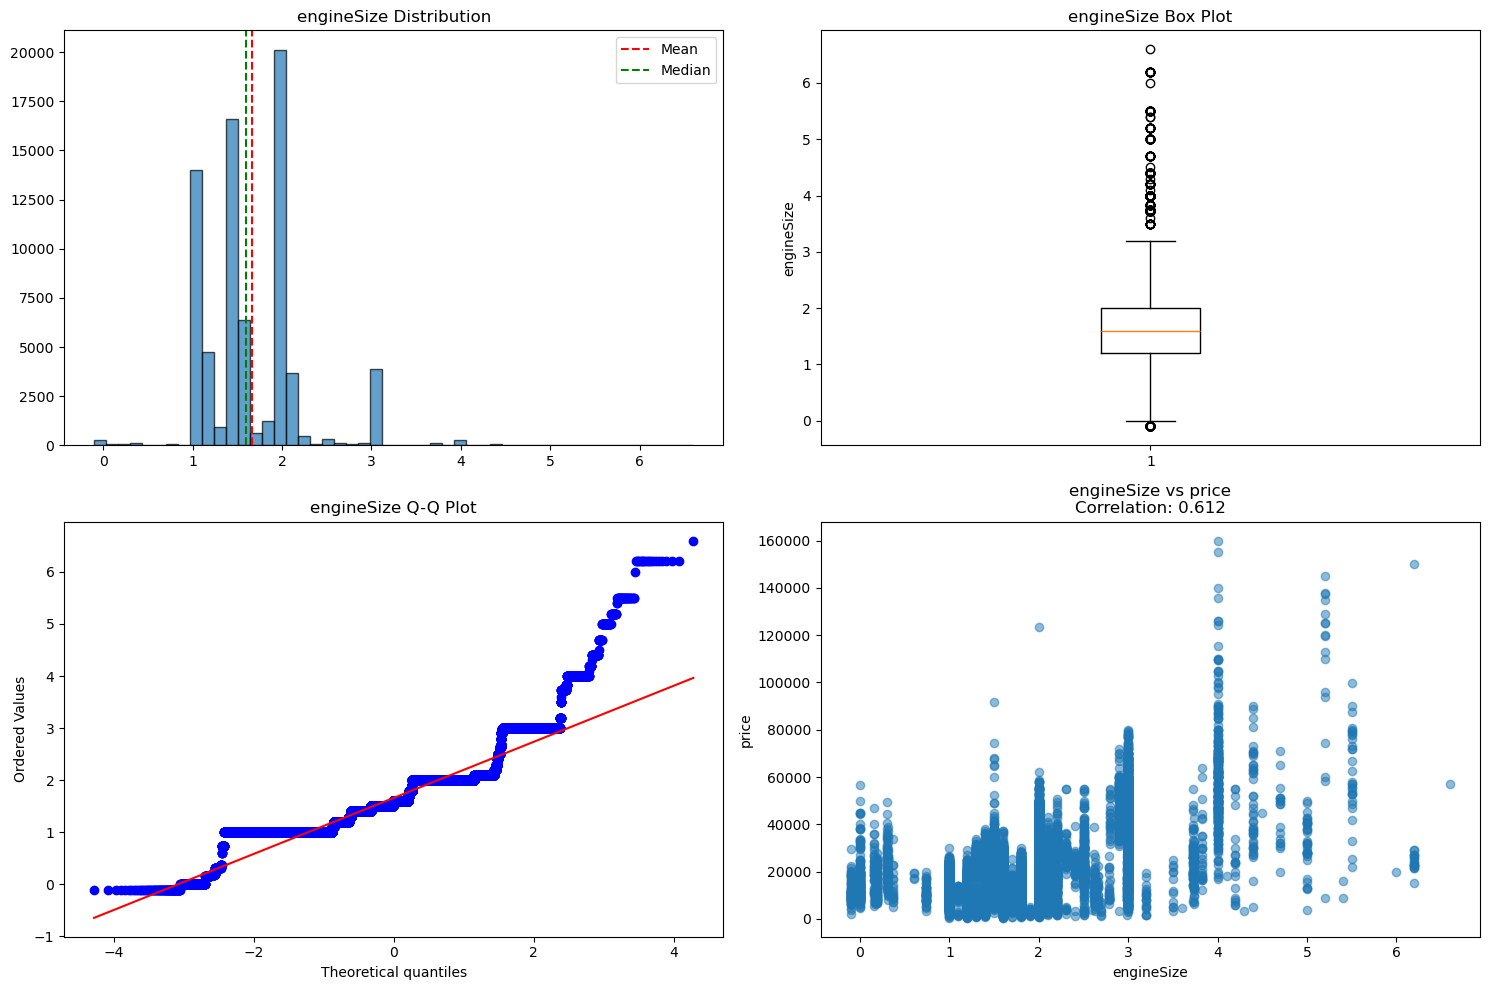


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Contains negative values - consider absolute transformation or offset
⚠️  Highly right-skewed - consider log transformation

=== ENGINE SIZE SPECIFIC ANALYSIS ===
Total entries with Engine Size <= 49cc (potential unit errors): 74193
Total entries with Engine Size <= 10 (very small/plausible for some vehicles): 74193
These small sizes might indicate the engine size was recorded in **liters** (e.g., a 2.0L engine recorded as 2.0)


In [23]:
analyze_numerical_feature(train_data, 'engineSize')

# Engine size specific analysis
# 1. Correctly identifies engines <= 49 AND > 0
small_engines = train_data[(train_data['engineSize'] <= 49) & (train_data['engineSize'] > 0)]

# 2. Correctly identifies small engines <= 10 AND > 0
# The original code's second filter was syntactically incorrect.
small_engines_plausible = train_data[(train_data['engineSize'] <= 10) & (train_data['engineSize'] > 0)]

print(f"\n=== ENGINE SIZE SPECIFIC ANALYSIS ===")
print(f"Total entries with Engine Size <= 49cc (potential unit errors): {len(small_engines)}")
print(f"Total entries with Engine Size <= 10 (very small/plausible for some vehicles): {len(small_engines_plausible)}")
print("These small sizes might indicate the engine size was recorded in **liters** (e.g., a 2.0L engine recorded as 2.0)")

### 8. paintQuality% - Paint Quality Assessment


ANALYZING: PAINTQUALITY%
=== BASIC STATISTICS ===
Count: 74449
Missing: 1524
Missing %: 2.006
Min: 1.638913092023202
Max: 125.59430831674894
Mean: 64.591
Median: 65.000
Std: 21.021
Skewness: -0.011
Kurtosis: -0.770

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 0 (0.00%)
Outliers (IQR method): 0 (0.00%)


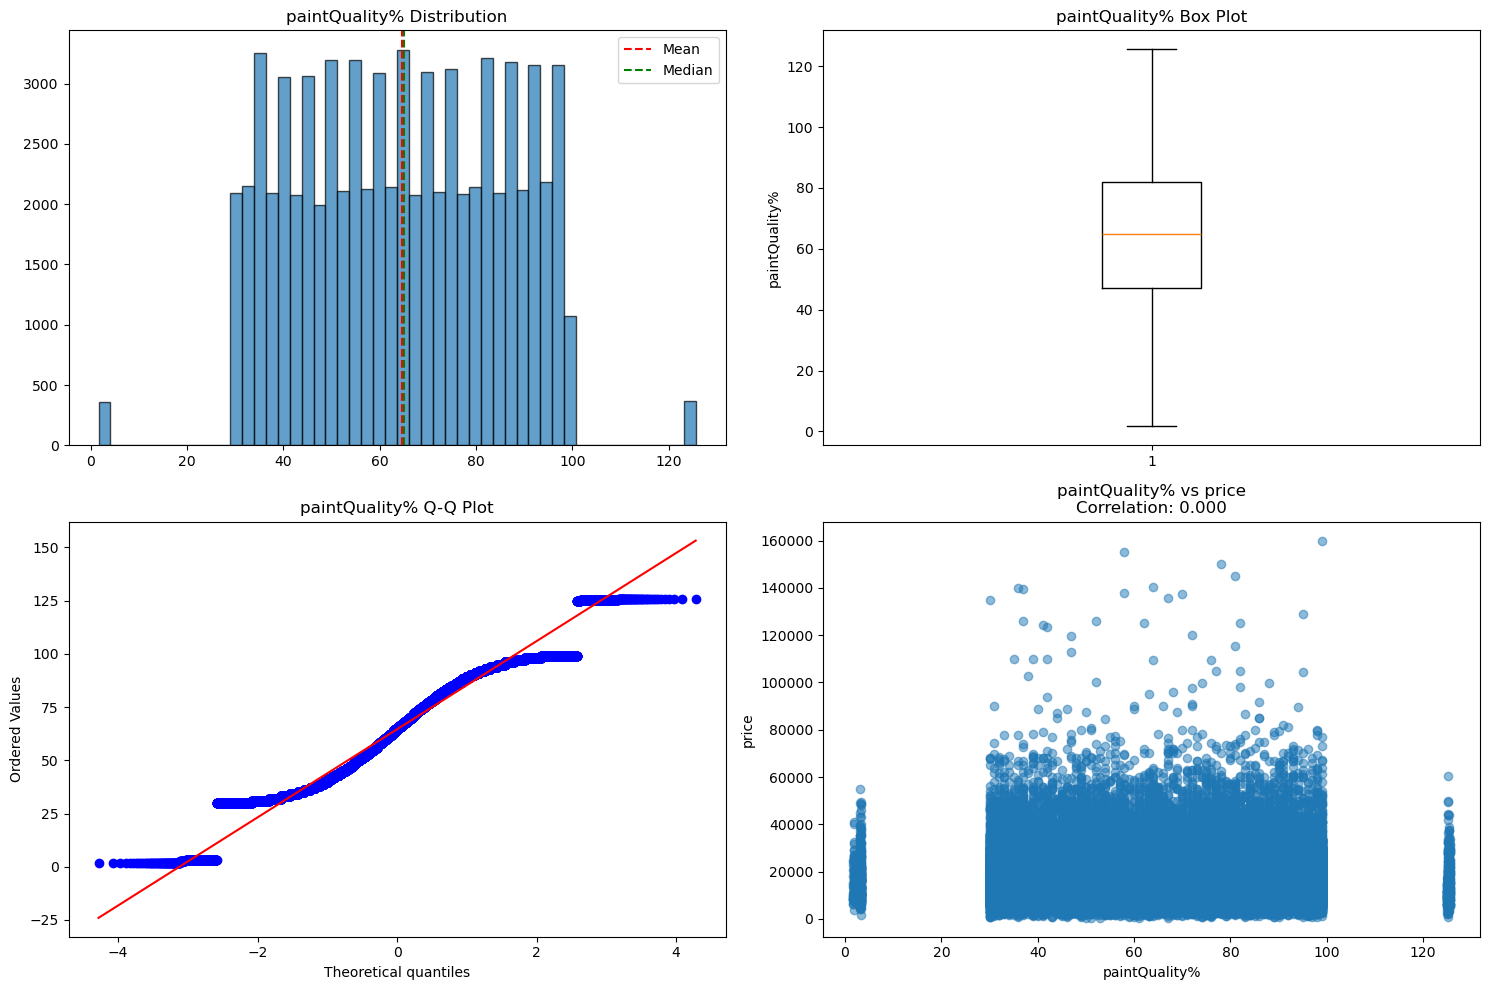


=== TRANSFORMATION SUGGESTIONS ===

=== PAINT QUALITY SPECIFIC ANALYSIS ===
Paint quality > 100%: 367 (invalid values)
Paint quality between 0% and 1%: 0 (potential unit error or mis-scaling)


In [27]:
analyze_numerical_feature(train_data, 'paintQuality%')

# Paint quality specific analysis
over_100_paint = len(train_data[train_data['paintQuality%'] > 100])

# FIX: Combine the two conditional series using the bitwise AND (&) and parentheses
between_0_and_1_paint = len(train_data[(train_data['paintQuality%'] > 0) & (train_data['paintQuality%'] < 1)])

print(f"\n=== PAINT QUALITY SPECIFIC ANALYSIS ===")
print(f"Paint quality > 100%: {over_100_paint} (invalid values)")
print(f"Paint quality between 0% and 1%: {between_0_and_1_paint} (potential unit error or mis-scaling)")

### 9. previousOwners - Number of Previous Owners



ANALYZING: PREVIOUSOWNERS
=== BASIC STATISTICS ===
Count: 74423
Missing: 1550
Missing %: 2.040
Min: -2.345650000530215
Max: 6.258370664185211
Mean: 1.995
Median: 2.000
Std: 1.473
Skewness: -0.003
Kurtosis: -0.853

=== DATA QUALITY ASSESSMENT ===
Negative values: 371 (0.50%)
Zero values: 14879 (19.99%)
Outliers (IQR method): 734 (0.99%)


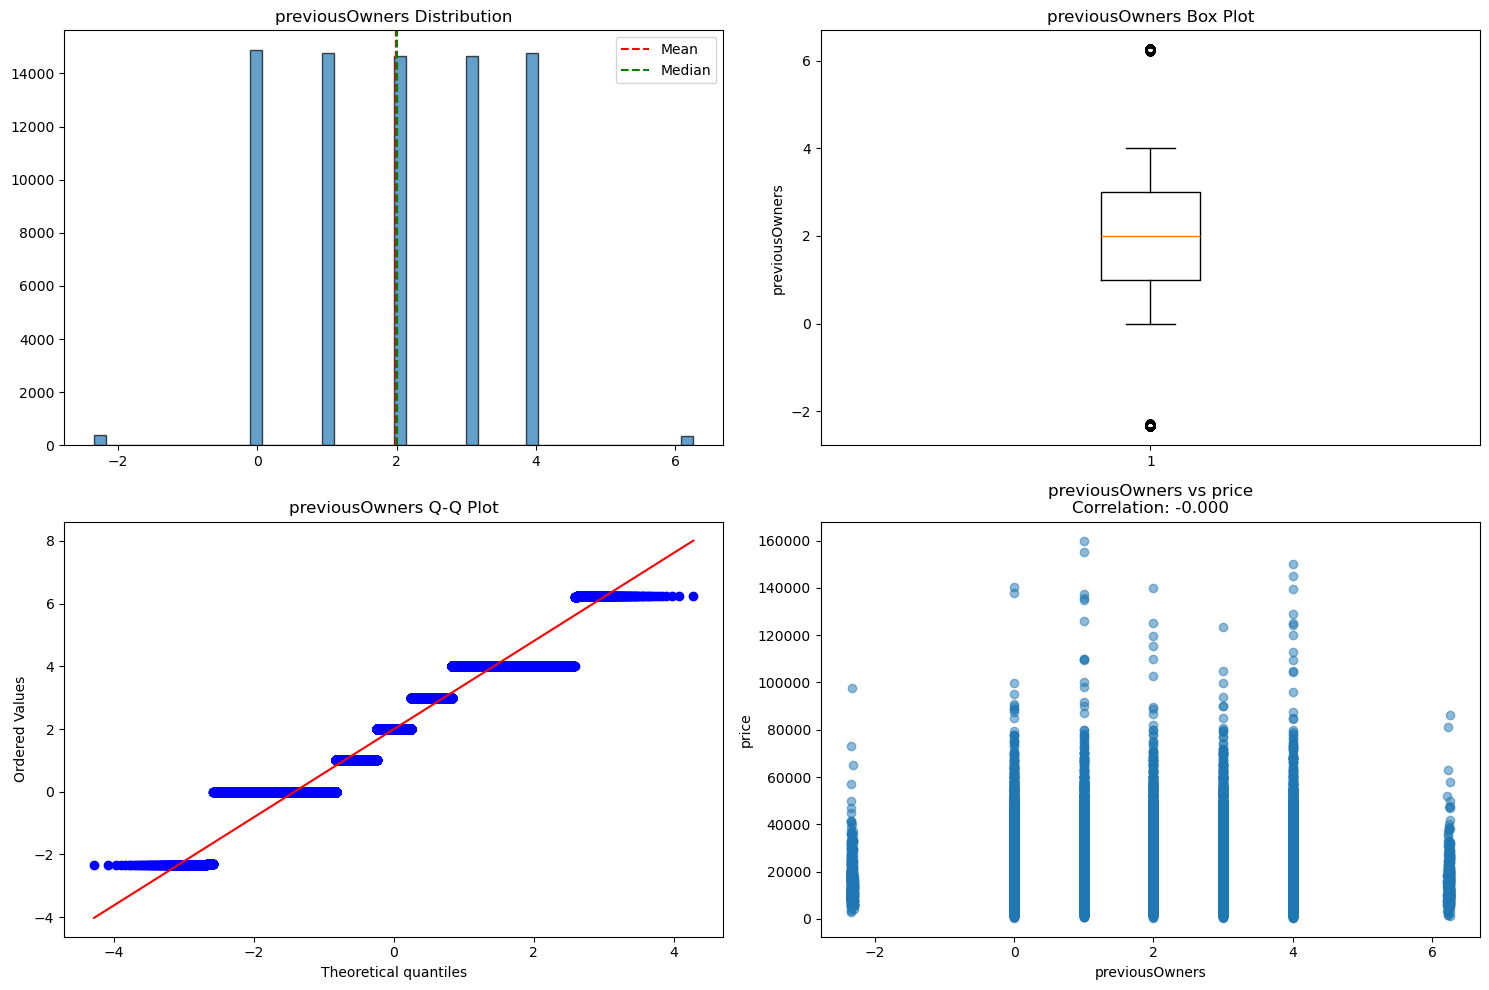


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Contains negative values - consider absolute transformation or offset
⚠️  Many zero values - consider log1p transformation

=== PREVIOUS OWNERS SPECIFIC ANALYSIS ===
Decimal previous owners: 2284
Negative previous owners: 371

ANALYZING: PREVIOUSOWNERS_ABS
=== BASIC STATISTICS ===
Count: 74423
Missing: 1550
Missing %: 2.040
Min: 0.0
Max: 6.258370664185211
Mean: 2.018
Median: 2.000
Std: 1.441
Skewness: 0.083
Kurtosis: -1.068

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 14879 (19.99%)
Outliers (IQR method): 363 (0.49%)


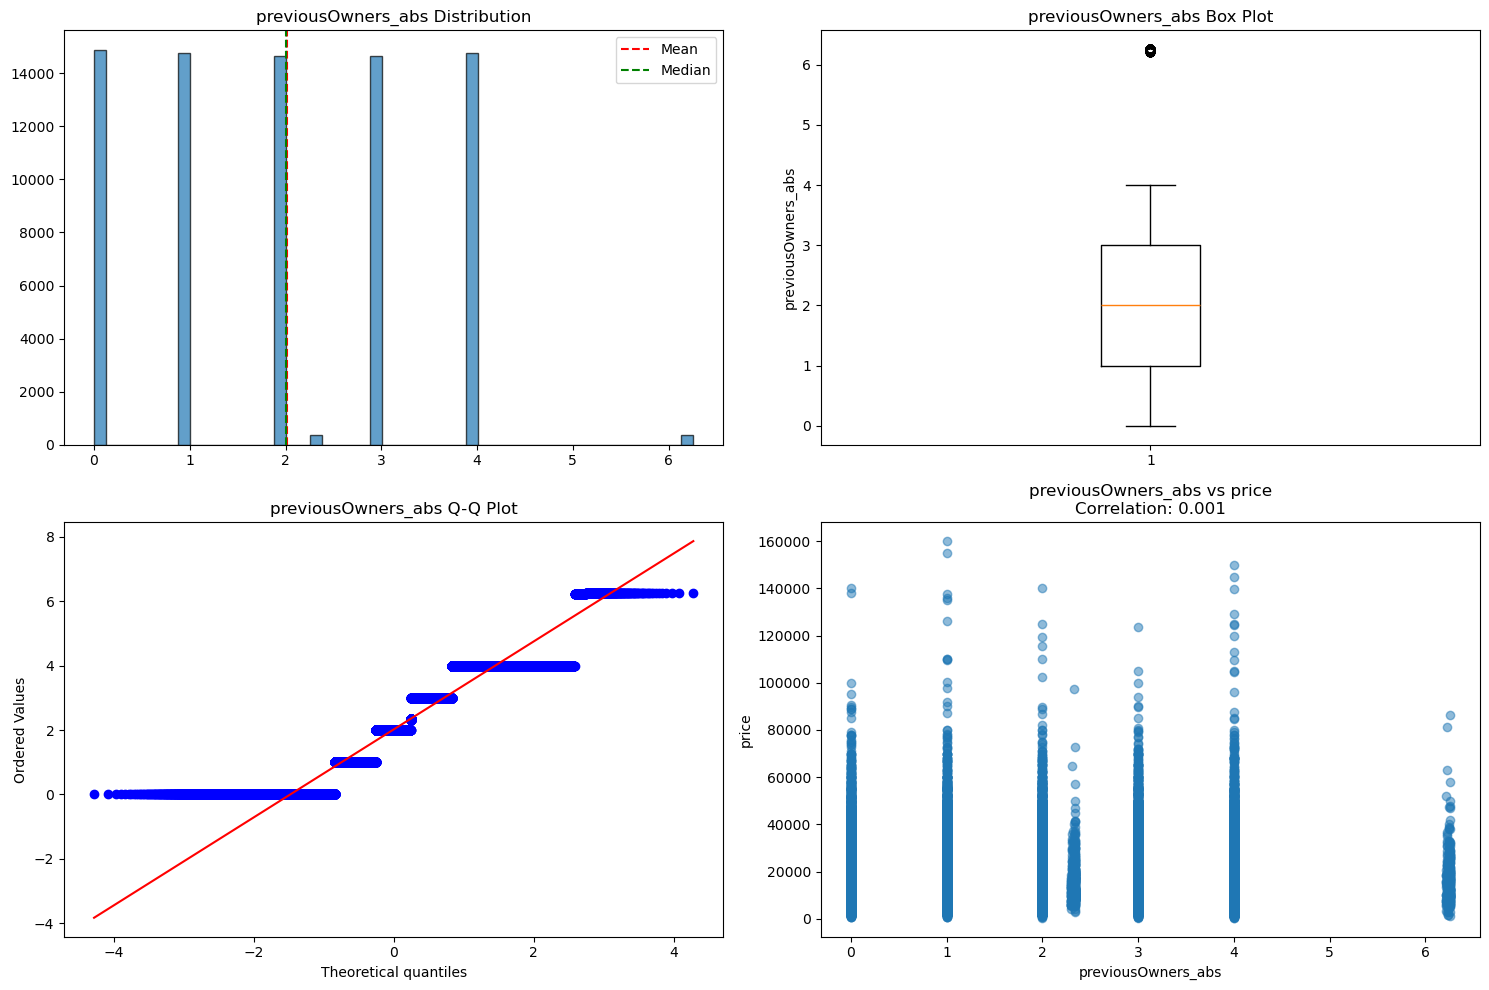


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Many zero values - consider log1p transformation


{'Count': 74423,
 'Missing': np.int64(1550),
 'Missing %': np.float64(2.0401984915693734),
 'Min': np.float64(0.0),
 'Max': np.float64(6.258370664185211),
 'Mean': np.float64(2.0178303624341596),
 'Median': np.float64(2.0),
 'Std': np.float64(1.4409657800456284),
 'Skewness': np.float64(0.08297517366526647),
 'Kurtosis': np.float64(-1.0679510177944496)}

In [31]:
analyze_numerical_feature(train_data, 'previousOwners')

# Previous owners specific analysis
decimal_owners = len(train_data[train_data['previousOwners'] % 1 != 0])
negative_owners = (train_data['previousOwners'] < 0).sum()
print(f"\n=== PREVIOUS OWNERS SPECIFIC ANALYSIS ===")
print(f"Decimal previous owners: {decimal_owners}")
print(f"Negative previous owners: {negative_owners}")


# Analysis with absolute values
analyze_numerical_feature(train_data.assign(previousOwners_abs=train_data['previousOwners'].abs()), 'previousOwners_abs')


ANALYZING: ABS_PREVIOUSOWNERS
=== BASIC STATISTICS ===
Count: 74423
Missing: 1550
Missing %: 2.040
Min: 0.0
Max: 1.9821553772285572
Mean: 0.961
Median: 1.099
Std: 0.572
Skewness: -0.570
Kurtosis: -0.955

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 14879 (19.99%)
Outliers (IQR method): 0 (0.00%)


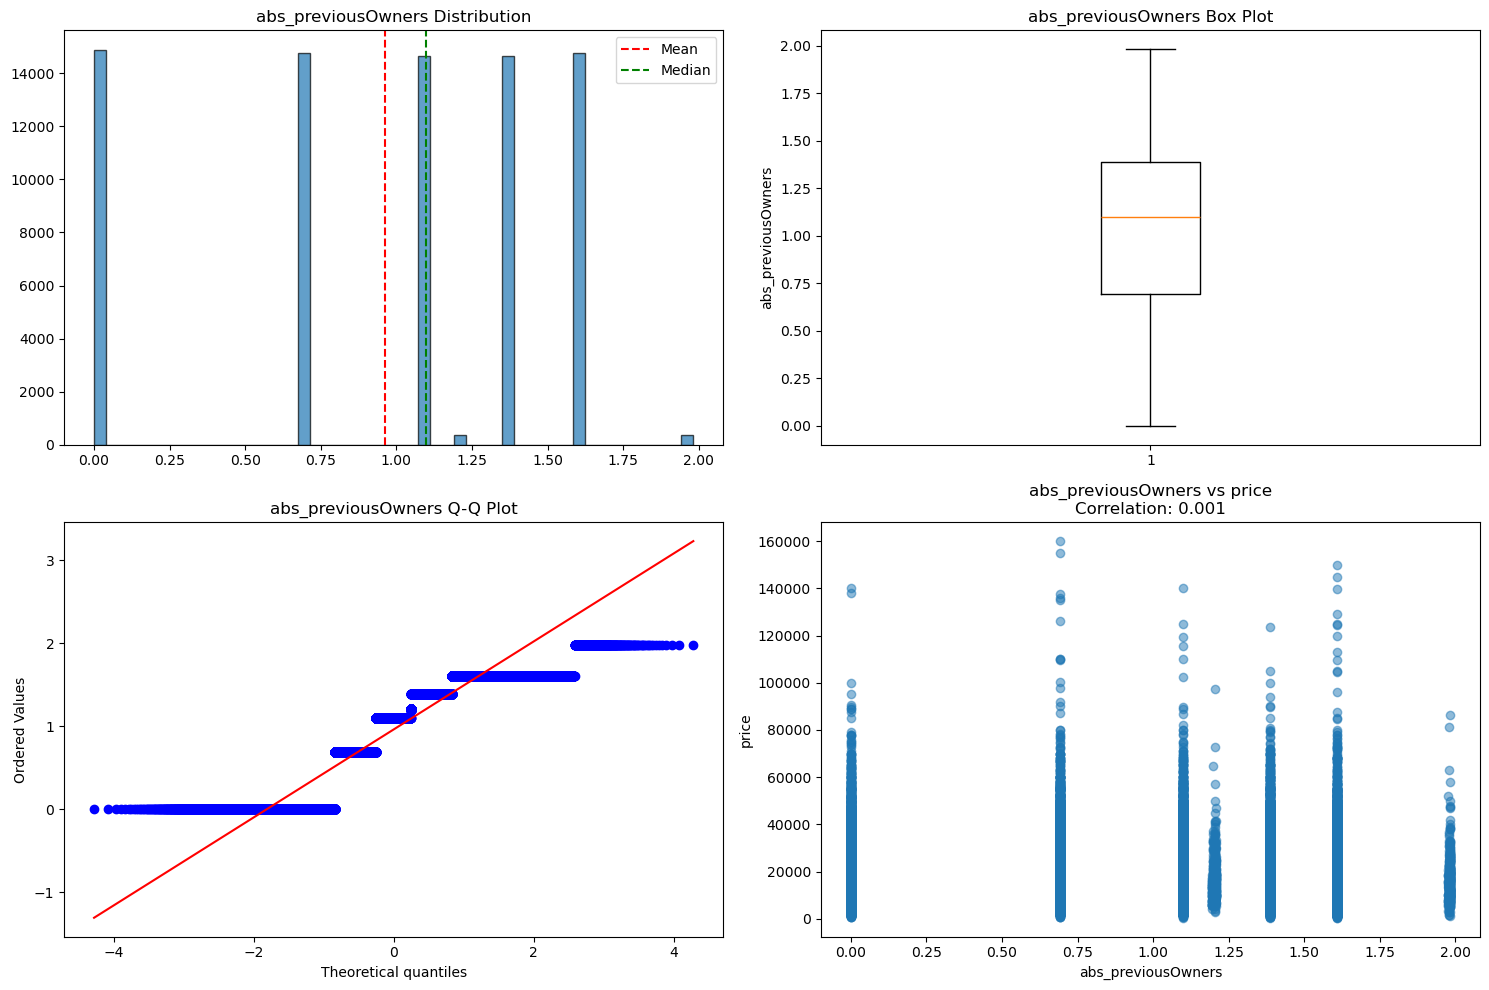


=== TRANSFORMATION SUGGESTIONS ===
⚠️  Many zero values - consider log1p transformation


{'Count': 74423,
 'Missing': np.int64(1550),
 'Missing %': np.float64(2.0401984915693734),
 'Min': np.float64(0.0),
 'Max': np.float64(1.9821553772285572),
 'Mean': np.float64(0.9613706803312415),
 'Median': np.float64(1.0986122886681098),
 'Std': np.float64(0.5718030751623608),
 'Skewness': np.float64(-0.5703838072054667),
 'Kurtosis': np.float64(-0.9554906155860321)}

In [ ]:
train_data['abs_log_previousOwners'] = np.log(np.abs(train_data['previousOwners'])+1)
analyze_numerical_feature(train_data, 'abs_log_previousOwners')

### 10. hasDamage - Damage Indicator

=== hasDamage ANALYSIS ===
Value counts (including NaN):
hasDamage
0.0    74425
NaN     1548
Name: count, dtype: int64


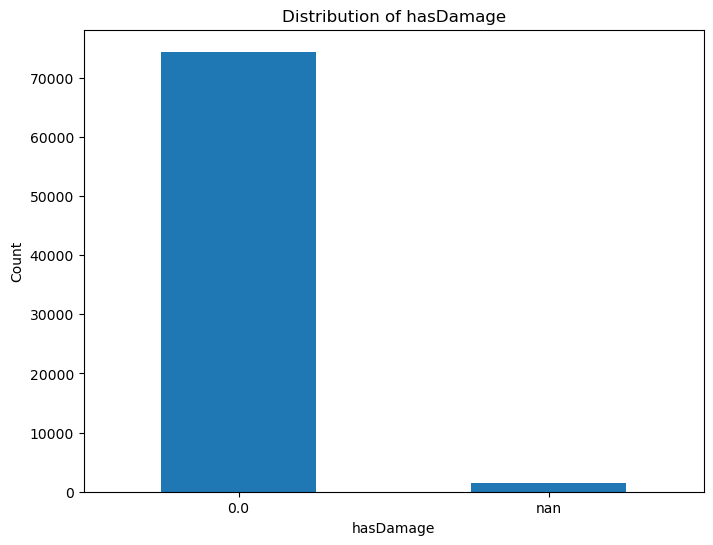


Suggestion: Convert NaN to 1 (assume damaged if not specified)


In [32]:
print("=== hasDamage ANALYSIS ===")
damage_counts = train_data['hasDamage'].value_counts(dropna=False)
print("Value counts (including NaN):")
print(damage_counts)

# Visualization
plt.figure(figsize=(8, 6))
damage_counts.plot(kind='bar')
plt.title('Distribution of hasDamage')
plt.xlabel('hasDamage')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nSuggestion: Convert NaN to 1 (assume damaged if not specified)")

---

## Categorical Features Analysis

Each categorical feature will be analyzed for:
- **Value Distribution**: Frequency of each category
- **Data Quality**: Missing values, inconsistent spellings
- **Cardinality**: Number of unique values
- **Suggested Preprocessing**: Encoding strategies, cleaning steps

### Helper Functions for Categorical Analysis

In [33]:
def analyze_categorical_feature(df, feature_name, top_n=20):
    """Comprehensive categorical feature analysis"""
    
    print(f"\n{'='*60}")
    print(f"ANALYZING: {feature_name.upper()}")
    print(f"{'='*60}")
    
    # Basic statistics
    total_count = len(df)
    missing_count = df[feature_name].isnull().sum()
    unique_count = df[feature_name].nunique()
    
    print("=== BASIC STATISTICS ===")
    print(f"Total records: {total_count:,}")
    print(f"Missing values: {missing_count:,} ({missing_count/total_count*100:.2f}%)")
    print(f"Unique values: {unique_count:,}")
    print(f"Cardinality ratio: {unique_count/total_count:.3f}")
    
    # Value counts
    value_counts = df[feature_name].value_counts(dropna=False)
    
    print(f"\n=== TOP {min(top_n, len(value_counts))} VALUES ===")
    print(value_counts.head(top_n))
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot of top categories
    top_categories = value_counts.head(top_n)
    axes[0].bar(range(len(top_categories)), top_categories.values)
    axes[0].set_xticks(range(len(top_categories)))
    axes[0].set_xticklabels(top_categories.index, rotation=45, ha='right')
    axes[0].set_title(f'Top {min(top_n, len(top_categories))} {feature_name} Categories')
    axes[0].set_ylabel('Count')
    
    # Pie chart for top categories
    if len(top_categories) <= 10:
        axes[1].pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
        axes[1].set_title(f'{feature_name} Distribution')
    else:
        # If too many categories, show top 10 + others
        top_10 = top_categories.head(10)
        others_sum = top_categories.iloc[10:].sum()
        
        pie_data = list(top_10.values) + [others_sum]
        pie_labels = list(top_10.index) + ['Others']
        
        axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
        axes[1].set_title(f'{feature_name} Distribution (Top 10 + Others)')
    
    plt.tight_layout()
    plt.show()
    
    # Data quality assessment
    print("\n=== DATA QUALITY ASSESSMENT ===")
    
    # Check for potential spelling variations
    if unique_count > 10:  # Only for high cardinality features
        print("⚠️  High cardinality feature - check for spelling variations")
        
        # Look for similar strings (basic check)
        values_lower = df[feature_name].dropna().str.lower().value_counts()
        original_unique = df[feature_name].dropna().nunique()
        lowercase_unique = len(values_lower)
        
        if lowercase_unique < original_unique:
            print(f"⚠️  Case sensitivity issues: {original_unique} → {lowercase_unique} unique values when lowercased")
    
    # Check for very rare categories
    rare_threshold = 0.01  # Less than 1%
    rare_categories = value_counts[value_counts < total_count * rare_threshold]
    
    if len(rare_categories) > 0:
        print(f"⚠️  {len(rare_categories)} rare categories (< {rare_threshold*100}% of data)")
        print(f"Consider grouping into 'Other' category")
    
    # Encoding suggestions
    print("\n=== ENCODING SUGGESTIONS ===")
    
    if unique_count == 2:
        print("✓ Binary feature - use Label Encoding (0/1)")
    elif unique_count <= 10:
        print("✓ Low cardinality - use One-Hot Encoding")
    elif unique_count <= 50:
        print("⚠️  Medium cardinality - consider Target Encoding or Ordinal Encoding")
    else:
        print("⚠️  High cardinality - consider:")
        print("  - Target/Mean Encoding")
        print("  - Feature hashing")
        print("  - Dimensionality reduction")
        print("  - Grouping rare categories")
    
    return value_counts

### 1. Brand - Car Brand


ANALYZING: BRAND
=== BASIC STATISTICS ===
Total records: 75,973
Missing values: 1,521 (2.00%)
Unique values: 72
Cardinality ratio: 0.001

=== TOP 25 VALUES ===
Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
Audi         6749
Toyota       4289
Skoda        3973
Hyundai      3066
NaN          1521
FORD          316
ord           315
ford          307
For           293
ercedes       233
mercedes      228
MERCEDES      227
Mercede       215
W             203
V             197
vw            193
Ope           180
pel           178
OPEL          169
opel          165
Name: count, dtype: int64


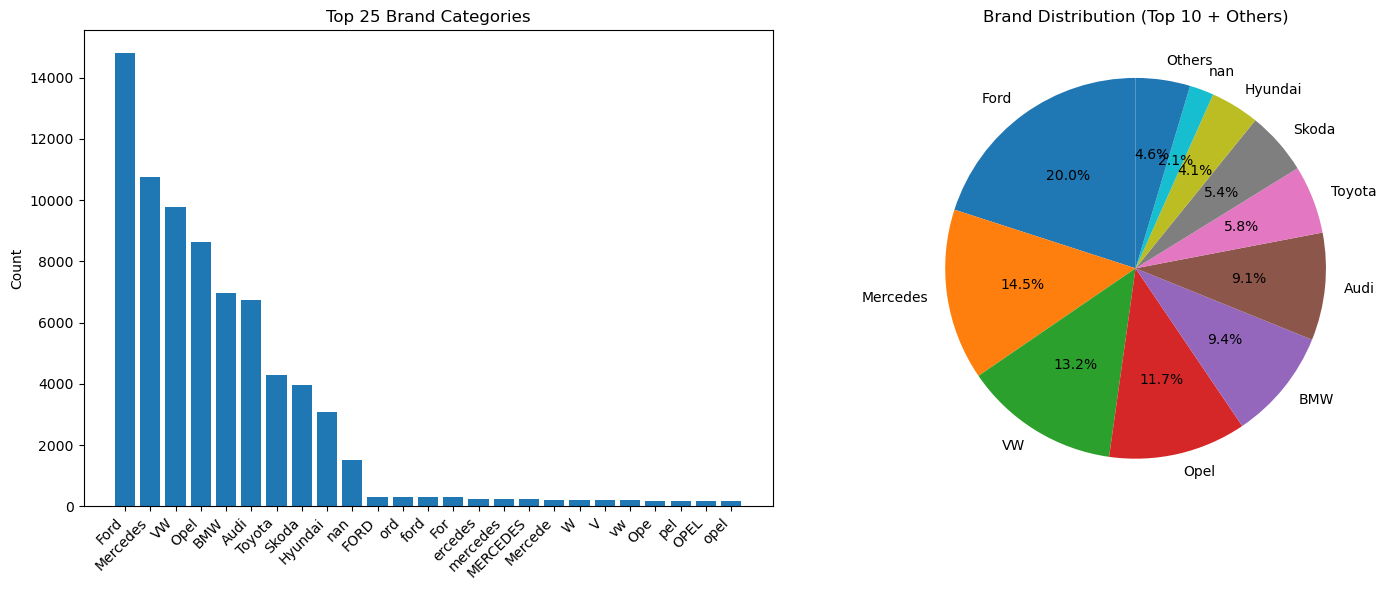


=== DATA QUALITY ASSESSMENT ===
⚠️  High cardinality feature - check for spelling variations
⚠️  Case sensitivity issues: 72 → 33 unique values when lowercased
⚠️  63 rare categories (< 1.0% of data)
Consider grouping into 'Other' category

=== ENCODING SUGGESTIONS ===
⚠️  High cardinality - consider:
  - Target/Mean Encoding
  - Feature hashing
  - Dimensionality reduction
  - Grouping rare categories

=== BRAND CLEANING SUGGESTIONS ===
Consider creating a brand mapping dictionary to standardize:
- Case variations (BMW vs bmw)
- Spelling variations (Mercedes vs Mercedes-Benz)
- Common abbreviations (VW vs Volkswagen)

Potential case/spelling issues:
'Opel' similar to: ['opel', 'OPEL']
'BMW' similar to: ['bmw']
'Mercedes' similar to: ['mercedes', 'MERCEDES']
'FOR' similar to: ['for', 'For']
'AUDI' similar to: ['audi', 'Audi']
'Audi' similar to: ['audi', 'AUDI']
'Toyot' similar to: ['toyot', 'TOYOT']
'Toyota' similar to: ['TOYOTA', 'toyota']
'PEL' similar to: ['pel']
'ORD' similar to: 

In [34]:
brand_counts = analyze_categorical_feature(train_data, 'Brand', top_n=25)

print("\n=== BRAND CLEANING SUGGESTIONS ===")
print("Consider creating a brand mapping dictionary to standardize:")
print("- Case variations (BMW vs bmw)")
print("- Spelling variations (Mercedes vs Mercedes-Benz)")
print("- Common abbreviations (VW vs Volkswagen)")

# Show potential case issues
print("\nPotential case/spelling issues:")
brands_lower = train_data['Brand'].str.lower().value_counts()
original_brands = set(train_data['Brand'].dropna())
for brand in original_brands:
    if brand and brand.lower() != brand:
        similar_brands = [b for b in original_brands if b and b.lower() == brand.lower() and b != brand]
        if similar_brands:
            print(f"'{brand}' similar to: {similar_brands}")

there are a lot of mistakes in the spelling of the brands, we should probably clean that up by mapping similar names to the same brand, probbly asking chatgpt to list the most common car brands in the uk and create a declination mapping that contains all the misspellings or variations of each brand name, although this feature might not be very useful for the model given the high cardinality and the possibility of not having the same brands in the test set, same for model

### 2. model - Car Model


ANALYZING: MODEL
=== BASIC STATISTICS ===
Total records: 75,973
Missing values: 1,517 (2.00%)
Unique values: 735
Cardinality ratio: 0.010

=== TOP 25 VALUES ===
model
 Focus       6353
 C Class     4886
 Fiesta      4130
 Golf        3081
 Corsa       2182
 Polo        2046
 Astra       1744
 A Class     1618
 3 Series    1566
NaN          1517
 Kuga        1382
 Mokka X     1357
 Yaris       1327
 Aygo        1298
 1 Series    1247
 A3          1231
 E Class     1196
 Tiguan      1116
 Fabia        990
 Octavia      945
 Q3           933
 A4           889
 A1           889
 Tucson       843
 2 Series     802
Name: count, dtype: int64


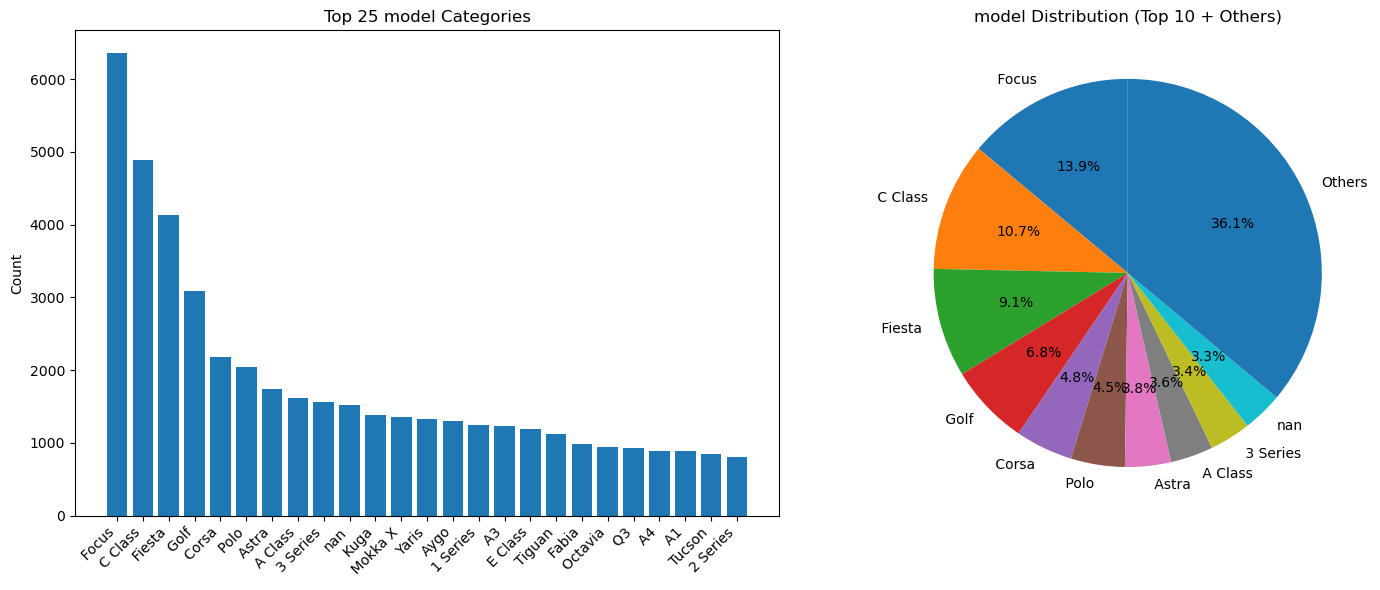


=== DATA QUALITY ASSESSMENT ===
⚠️  High cardinality feature - check for spelling variations
⚠️  Case sensitivity issues: 735 → 447 unique values when lowercased
⚠️  711 rare categories (< 1.0% of data)
Consider grouping into 'Other' category

=== ENCODING SUGGESTIONS ===
⚠️  High cardinality - consider:
  - Target/Mean Encoding
  - Feature hashing
  - Dimensionality reduction
  - Grouping rare categories

=== MODEL ANALYSIS ===
High cardinality feature - consider grouping strategies:
- Group by car segment (compact, sedan, SUV, etc.)
- Use only brand information
- Target encoding based on price


In [35]:
model_counts = analyze_categorical_feature(train_data, 'model', top_n=25)

print("\n=== MODEL ANALYSIS ===")
print("High cardinality feature - consider grouping strategies:")
print("- Group by car segment (compact, sedan, SUV, etc.)")
print("- Use only brand information")
print("- Target encoding based on price")

### 3. transmission - Transmission Type


ANALYZING: TRANSMISSION
=== BASIC STATISTICS ===
Total records: 75,973
Missing values: 1,522 (2.00%)
Unique values: 40
Cardinality ratio: 0.001

=== TOP 20 VALUES ===
transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
NaN           1522
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
Name: count, dtype: int64


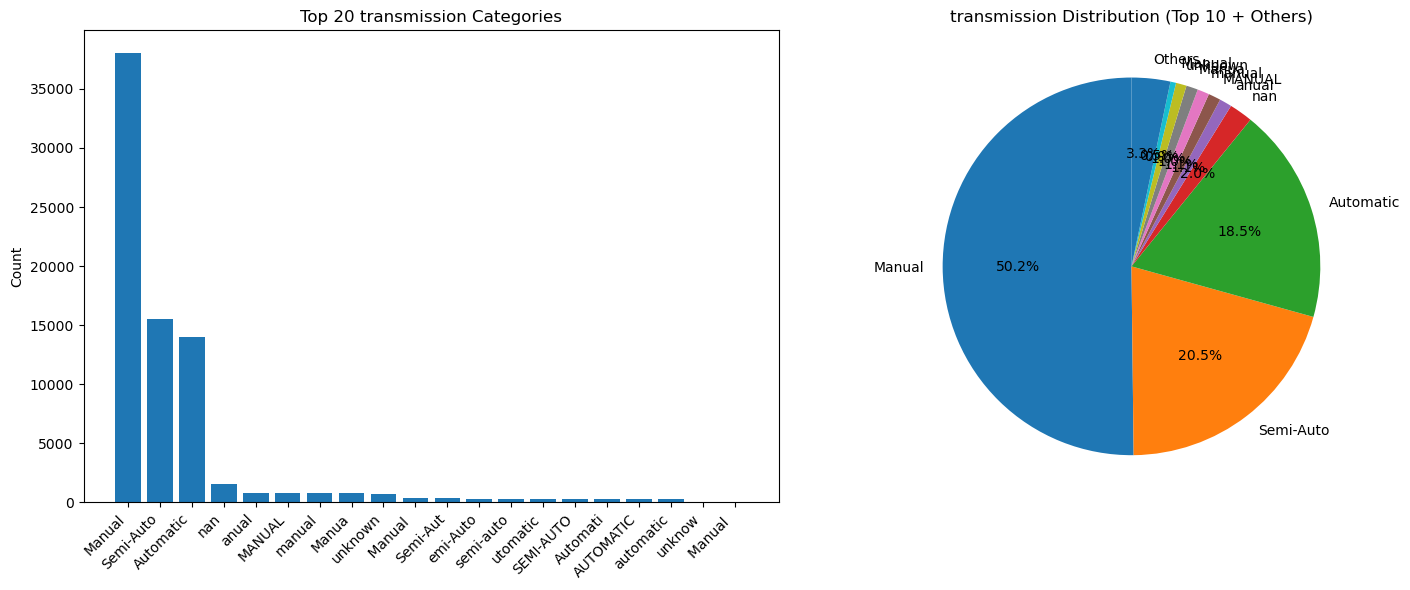


=== DATA QUALITY ASSESSMENT ===
⚠️  High cardinality feature - check for spelling variations
⚠️  Case sensitivity issues: 40 → 20 unique values when lowercased
⚠️  34 rare categories (< 1.0% of data)
Consider grouping into 'Other' category

=== ENCODING SUGGESTIONS ===
⚠️  Medium cardinality - consider Target Encoding or Ordinal Encoding

=== TRANSMISSION ANALYSIS ===
Likely categories: Manual, Automatic, Semi-Auto
Check for variations and clean accordingly


In [36]:
transmission_counts = analyze_categorical_feature(train_data, 'transmission')

print("\n=== TRANSMISSION ANALYSIS ===")
print("Likely categories: Manual, Automatic, Semi-Auto")
print("Check for variations and clean accordingly")

### 4. fuelType - Fuel Type


ANALYZING: FUELTYPE
=== BASIC STATISTICS ===
Total records: 75,973
Missing values: 1,511 (1.99%)
Unique values: 34
Cardinality ratio: 0.000

=== TOP 20 VALUES ===
fuelType
Petrol    37995
Diesel    28474
Hybrid     2043
NaN        1511
PETROL      795
etrol       794
Petro       785
petrol      746
iesel       603
diesel      599
Diese       582
DIESEL      582
Other       150
HYBRID       50
hybrid       46
Hybri        43
ybrid        37
petro        18
etro         17
ETROL        16
Name: count, dtype: int64


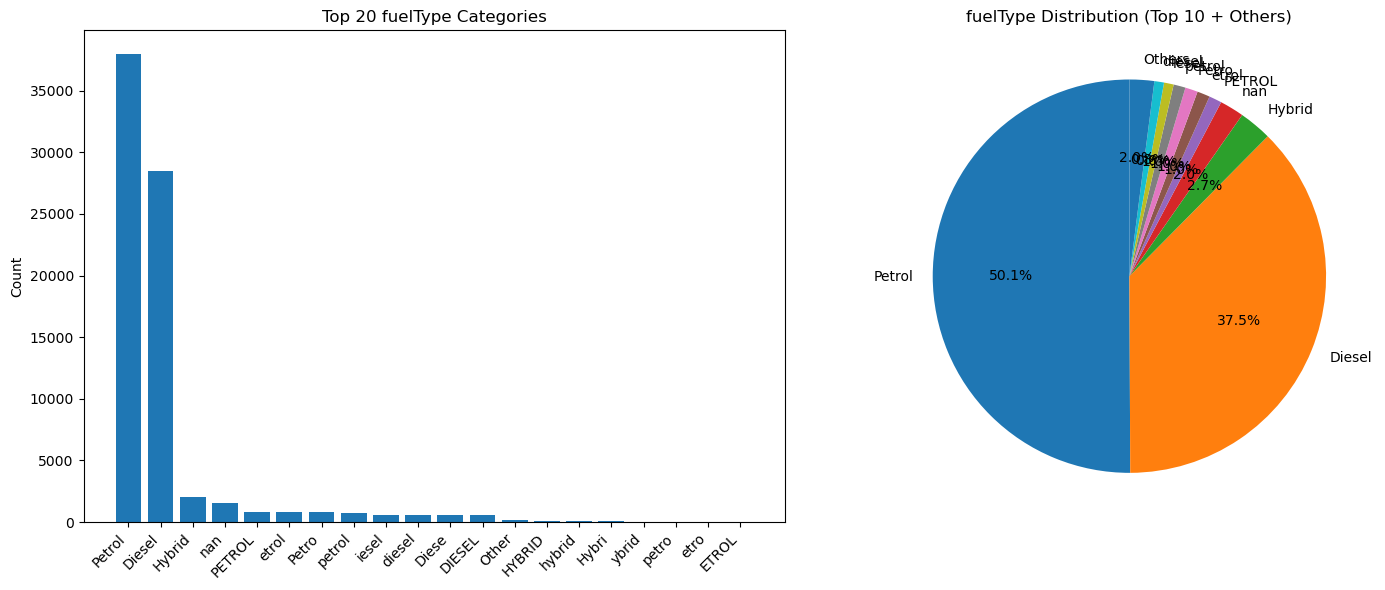


=== DATA QUALITY ASSESSMENT ===
⚠️  High cardinality feature - check for spelling variations
⚠️  Case sensitivity issues: 34 → 16 unique values when lowercased
⚠️  28 rare categories (< 1.0% of data)
Consider grouping into 'Other' category

=== ENCODING SUGGESTIONS ===
⚠️  Medium cardinality - consider Target Encoding or Ordinal Encoding

=== FUEL TYPE ANALYSIS ===
Expected categories: Petrol, Diesel, Hybrid, Electric
Check relationship with tax (electric cars often have £0 tax)

Fuel Type vs Tax relationship:
                mean  median  count
fuelType                           
DIESE     116.875000   145.0      8
DIESEL    107.448148   145.0    522
Diese     116.578265   145.0    522
Diesel    114.873607   145.0  25333
ETRO      145.000000   145.0      1
ETROL     127.865404   145.0     16
Electric    0.000000     0.0      4
HYBRI      67.500000    67.5      2
HYBRID     75.501849   135.0     46
Hybri      39.230769     0.0     39
Hybrid     72.832169   135.0   1917
IESE      145.0

In [37]:
fuel_counts = analyze_categorical_feature(train_data, 'fuelType')

print("\n=== FUEL TYPE ANALYSIS ===")
print("Expected categories: Petrol, Diesel, Hybrid, Electric")
print("Check relationship with tax (electric cars often have £0 tax)")

# Relationship with tax
fuel_tax_relationship = train_data.groupby('fuelType')['tax'].agg(['mean', 'median', 'count'])
print("\nFuel Type vs Tax relationship:")
print(fuel_tax_relationship)

---

## Feature Engineering

This section explores creating new features that might improve model performance.

### 1. Car Age Feature

=== CAR AGE FEATURE ===

ANALYZING: CAR_AGE
=== BASIC STATISTICS ===
Count: 74482
Missing: 1491
Missing %: 1.963
Min: 0.6303356728117305
Max: 4.02535169073515
Mean: 2.159
Median: 2.197
Std: 0.234
Skewness: -0.083
Kurtosis: 4.227

=== DATA QUALITY ASSESSMENT ===
Negative values: 0 (0.00%)
Zero values: 0 (0.00%)
Outliers (IQR method): 890 (1.19%)


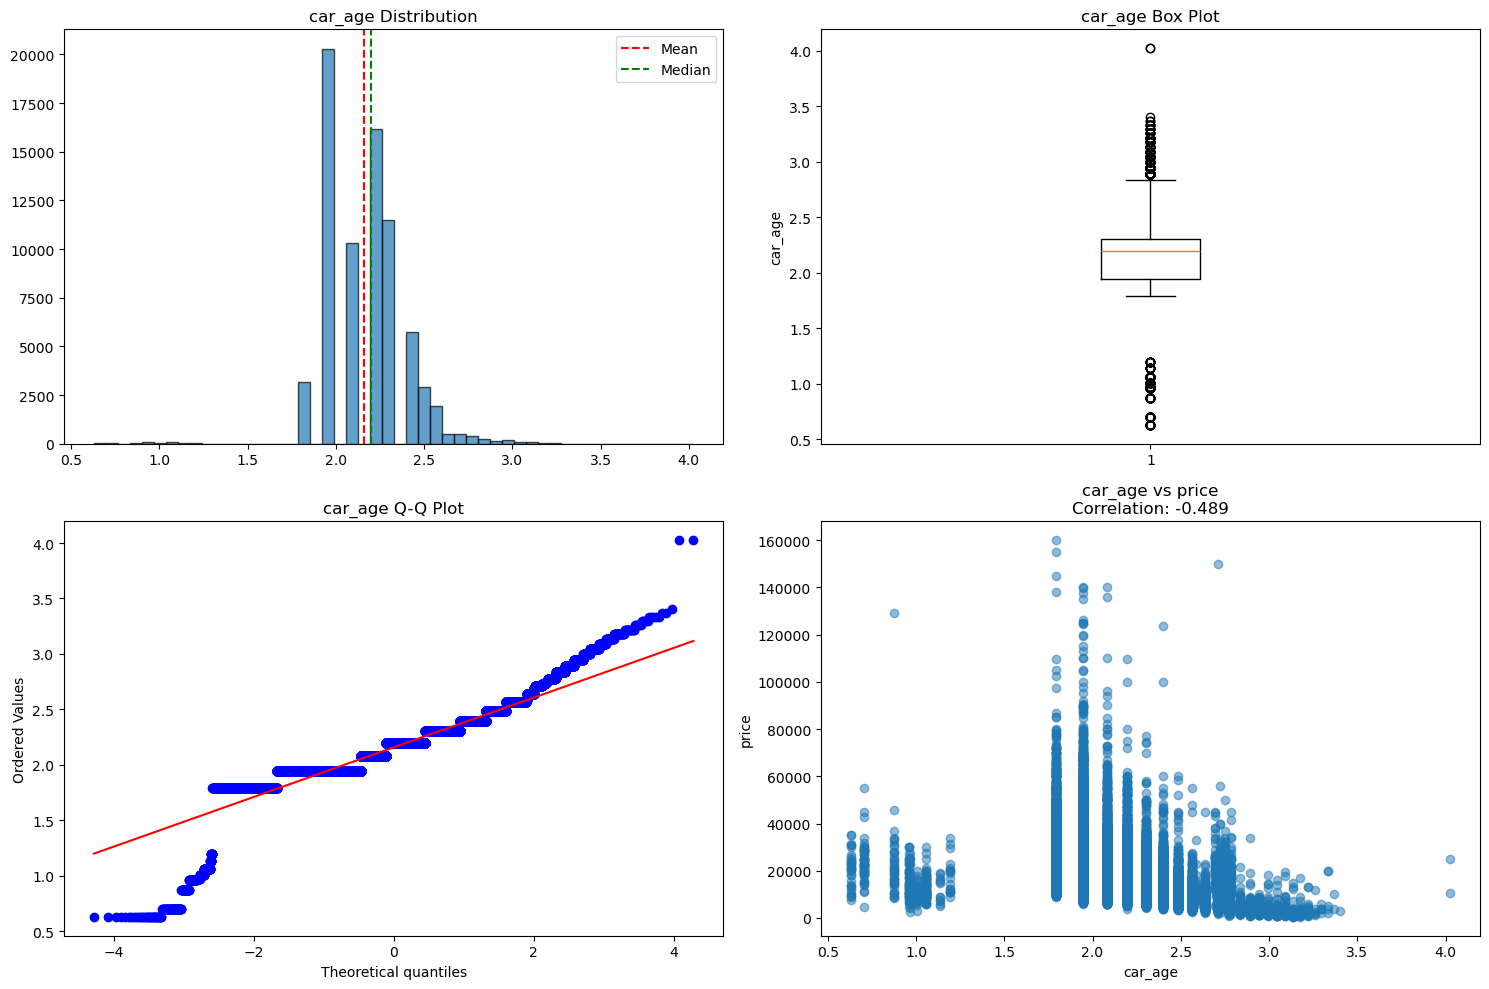


=== TRANSFORMATION SUGGESTIONS ===


{'Count': 74482,
 'Missing': np.int64(1491),
 'Missing %': np.float64(1.9625393231806036),
 'Min': np.float64(0.6303356728117305),
 'Max': np.float64(4.02535169073515),
 'Mean': np.float64(2.1587228717686666),
 'Median': np.float64(2.1972245773362196),
 'Std': np.float64(0.2341888913484389),
 'Skewness': np.float64(-0.08266929835592395),
 'Kurtosis': np.float64(4.227013048063565)}

In [41]:
# Create car age feature
current_year = 2025
train_data_fe = train_data.copy()
train_data_fe['car_age'] = np.log(current_year - train_data_fe['year']+ 1)

print("=== CAR AGE FEATURE ===")
analyze_numerical_feature(train_data_fe, 'car_age')

---

## Summary Visualizations Dashboard

This section provides a comprehensive visual overview of all key findings.

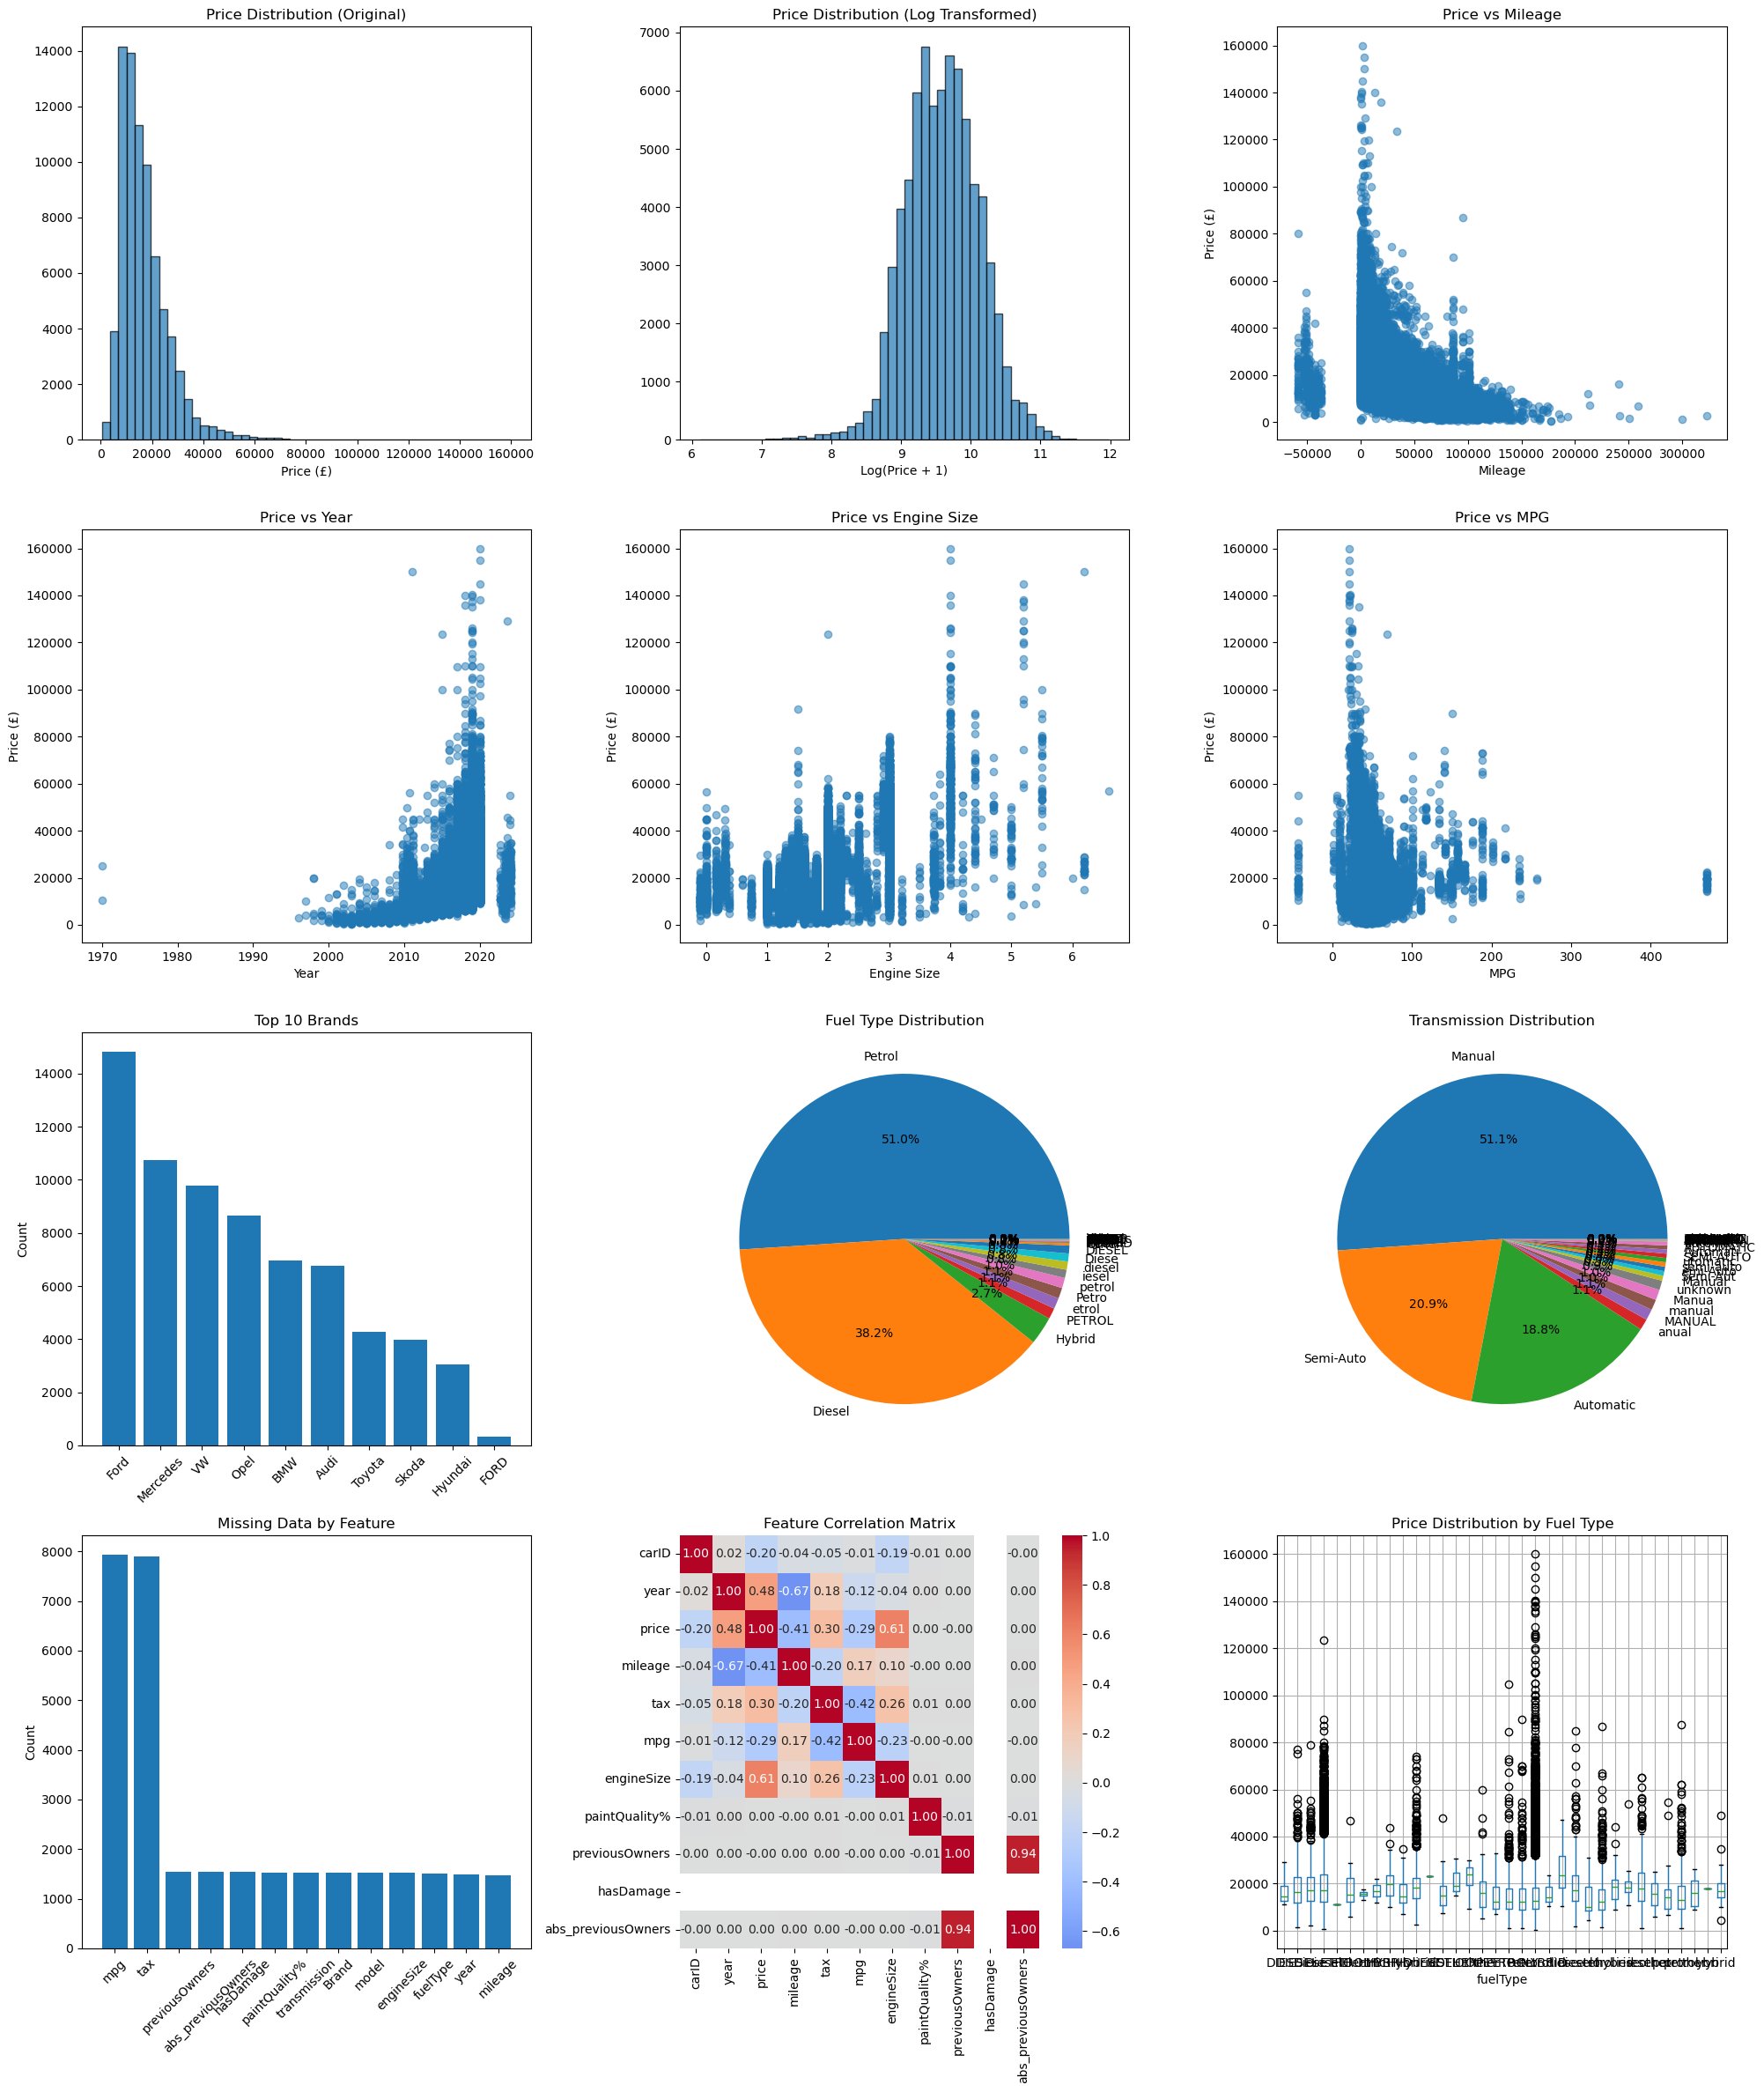

In [44]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 24))

# 1. Price distribution and transformations
plt.subplot(4, 3, 1)
plt.hist(train_data['price'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Price Distribution (Original)')
plt.xlabel('Price (£)')

plt.subplot(4, 3, 2)
plt.hist(np.log1p(train_data['price'] + 1), bins=50, alpha=0.7, edgecolor='black')
plt.title('Price Distribution (Log Transformed)')
plt.xlabel('Log(Price + 1)')

# 2. Key numerical features
plt.subplot(4, 3, 3)
plt.scatter(train_data['mileage'], train_data['price'], alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Price (£)')
plt.title('Price vs Mileage')

plt.subplot(4, 3, 4)
plt.scatter(train_data['year'], train_data['price'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price (£)')
plt.title('Price vs Year')

plt.subplot(4, 3, 5)
plt.scatter(train_data['engineSize'], train_data['price'], alpha=0.5)
plt.xlabel('Engine Size')
plt.ylabel('Price (£)')
plt.title('Price vs Engine Size')

plt.subplot(4, 3, 6)
plt.scatter(train_data['mpg'], train_data['price'], alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Price (£)')
plt.title('Price vs MPG')

# 3. Categorical features
plt.subplot(4, 3, 7)
brand_top10 = train_data['Brand'].value_counts().head(10)
plt.bar(range(len(brand_top10)), brand_top10.values)
plt.xticks(range(len(brand_top10)), brand_top10.index, rotation=45)
plt.title('Top 10 Brands')
plt.ylabel('Count')

plt.subplot(4, 3, 8)
fuel_counts = train_data['fuelType'].value_counts()
plt.pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Fuel Type Distribution')

plt.subplot(4, 3, 9)
transmission_counts = train_data['transmission'].value_counts()
plt.pie(transmission_counts.values, labels=transmission_counts.index, autopct='%1.1f%%')
plt.title('Transmission Distribution')

# 4. Data quality overview
plt.subplot(4, 3, 10)
missing_data = train_data.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
plt.bar(range(len(missing_data)), missing_data.values)
plt.xticks(range(len(missing_data)), missing_data.index, rotation=45)
plt.title('Missing Data by Feature')
plt.ylabel('Count')

plt.subplot(4, 3, 11)
# Correlation heatmap of numerical features
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')

plt.subplot(4, 3, 12)
# Price by fuel type boxplot
train_data.boxplot(column='price', by='fuelType', ax=plt.gca())
plt.title('Price Distribution by Fuel Type')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()